In [50]:
import os
import pandas as pd
import numpy as np
from typing import List, Dict

from datacat4ml.const import FETCH_DATA_DIR
from datacat4ml.const import CAT_DATA_DIR, CAT_HHD_OR_DIR, CAT_MHD_OR_DIR, CAT_HHD_GPCR_DIR, CAT_MHD_GPCR_DIR # The LHD dirs are in the corresponding MHD dirs.
from datacat4ml.const import CURA_DATA_DIR, CURA_HHD_OR_DIR, CURA_MHD_OR_DIR, CURA_MHD_effect_OR_DIR, CURA_LHD_OR_DIR, CURA_HHD_GPCR_DIR, CURA_MHD_GPCR_DIR, CURA_LHD_GPCR_DIR
from datacat4ml.const import SPL_DATA_DIR, SPL_HHD_OR_DIR, SPL_MHD_OR_DIR, SPL_MHD_effect_OR_DIR, SPL_LHD_OR_DIR
from datacat4ml.const import FEAT_DATA_DIR, FEAT_HHD_OR_DIR , FEAT_MHD_OR_DIR , FEAT_MHD_effect_OR_DIR, FEAT_LHD_OR_DIR
from datacat4ml.const import CAT_FIG_DIR, CURA_FIG_DIR, SPL_FIG_DIR, FEAT_FIG_DIR
from datacat4ml.const import OR_chemblids_name

from datacat4ml.utils import mkdirs
#from datacat4ml.Scripts.data_prep.data_featurize.feat_postproc import hhd_gpcr_failed, mhd_gpcr_failed

# ===================== plotting =====================
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import get_font_names
# Get a list of all available font names in alphabetical order
print(f"Available font names: \n{sorted(get_font_names())}")

from adjustText import adjust_text

#======================= RDKit =======================
from rdkit import Chem
from rdkit.Chem import AllChem, rdFMCS, Draw, PandasTools
from rdkit.Chem.Draw import MolsToGridImage
from IPython.display import display

#======================= t-SNE =======================
#======================= data_split =======================
from IPython.display import display

Available font names: 
['C059', 'Cantarell', 'D050000L', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif Display', 'Droid Arabic Kufi', 'Droid Sans', 'Droid Sans Armenian', 'Droid Sans Devanagari', 'Droid Sans Ethiopic', 'Droid Sans Fallback', 'Droid Sans Georgian', 'Droid Sans Hebrew', 'Droid Sans Japanese', 'Droid Sans Tamil', 'Droid Sans Thai', 'Nimbus Mono PS', 'Nimbus Roman', 'Nimbus Sans', 'Nimbus Sans Narrow', 'P052', 'STIXGeneral', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'Source Code Pro', 'URW Bookman', 'URW Gothic', 'Z003', 'cmb10', 'cmex10', 'cmmi10', 'cmr10', 'cmss10', 'cmsy10', 'cmtt10']


In [ ]:
# read curated data
in_path = '/storage/homefs/yc24j783/datacat4ml/datacat4ml/Data/data_prep/data_curate/cura_hhd_or'
csv_file = 'CHEMBL233_None_None_Ki_None_hhd_b50_b50_curated.csv'

cura_df = pd.read_csv(os.path.join(in_path, 'rmvDupMol0', csv_file))
print(f'cura_df shape: {cura_df.shape}')
cura_df.head()

cura_df shape: (5258, 50)


,activity_id,assay_id,assay_chembl_id,tid,target_chembl_id,standard_type,standard_relation,standard_value,standard_units,pchembl_value,...,vs_activity,vs_threshold,lo_activity_comment,lo_activity,lo_threshold,stereoSiblings,effect,assay,effect_description,assay_keywords_description
0,32316,148100,CHEMBL751582,129,CHEMBL233,Ki,=,10620.0,nM,4.97,...,0.0,5.0,inactive,0.0,6.3,False,NaN,NaN,NaN,NaN
1,32321,148100,CHEMBL751582,129,CHEMBL233,Ki,=,1591.0,nM,5.80,...,1.0,5.0,inactive,0.0,6.3,True,NaN,NaN,NaN,NaN
2,34724,148100,CHEMBL751582,129,CHEMBL233,Ki,=,801.0,nM,6.10,...,1.0,5.0,inactive,0.0,6.3,True,NaN,NaN,NaN,NaN
3,34729,148100,CHEMBL751582,129,CHEMBL233,Ki,=,1599.0,nM,5.80,...,1.0,5.0,inactive,0.0,6.3,False,NaN,NaN,NaN,NaN
4,35960,148100,CHEMBL751582,129,CHEMBL233,Ki,=,865.0,nM,6.06,...,1.0,5.0,inactive,0.0,6.3,True,NaN,NaN,NaN,NaN


In [81]:
# read split data (only internal split data)
in_path = '/storage/homefs/yc24j783/datacat4ml/datacat4ml/Data/data_prep/data_split/spl_hhd_or'
csv_file = 'CHEMBL233_None_None_Ki_None_hhd_b50_b50_split.csv'
spl_df = pd.read_csv(os.path.join(in_path, 'rmvDupMol0', csv_file))

print(f'spl_df shape: {spl_df.shape}')
print(f'spl_df columns: {spl_df.columns.tolist()[50:]}')

# child file
in_path_child = '/storage/homefs/yc24j783/datacat4ml/datacat4ml/Data/data_prep/data_split/spl_mhd_or'
#csv_file_child = 'CHEMBL233_antag_G-GTP_Ki_None_mhd_b50_b50_split.csv'
csv_file_child ='CHEMBL233_bind_RBA_Ki_None_mhd_b50_b50_split.csv'
spl_df_child = pd.read_csv(os.path.join(in_path_child, 'rmvDupMol0', csv_file_child))
print(f'spl_df_child shape: {spl_df_child.shape}')
print(f'spl_df_child columns: {spl_df_child.columns.tolist()[50:]}')

/tmp/ipykernel_783336/125149745.py:4: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  spl_df = pd.read_csv(os.path.join(in_path, 'rmvDupMol0', csv_file))


spl_df shape: (5258, 427)
spl_df columns: ['int.rmvStereo0_rs_lo_fold0', 'int.rmvStereo0_rs_lo_fold1', 'int.rmvStereo0_rs_lo_fold2', 'int.rmvStereo0_rs_lo_fold3', 'int.rmvStereo0_rs_lo_fold4', 'int.rmvStereo1_rs_lo_fold0', 'int.rmvStereo1_rs_lo_fold1', 'int.rmvStereo1_rs_lo_fold2', 'int.rmvStereo1_rs_lo_fold3', 'int.rmvStereo1_rs_lo_fold4', 'int.rmvStereo0_rs_vs_fold0', 'int.rmvStereo0_rs_vs_fold1', 'int.rmvStereo0_rs_vs_fold2', 'int.rmvStereo0_rs_vs_fold3', 'int.rmvStereo0_rs_vs_fold4', 'int.rmvStereo1_rs_vs_fold0', 'int.rmvStereo1_rs_vs_fold1', 'int.rmvStereo1_rs_vs_fold2', 'int.rmvStereo1_rs_vs_fold3', 'int.rmvStereo1_rs_vs_fold4', 'int.rmvStereo0_cs_fold0', 'int.rmvStereo0_cs_fold1', 'int.rmvStereo0_cs_fold2', 'int.rmvStereo0_cs_fold3', 'int.rmvStereo0_cs_fold4', 'int.rmvStereo1_cs_fold0', 'int.rmvStereo1_cs_fold1', 'int.rmvStereo1_cs_fold2', 'int.rmvStereo1_cs_fold3', 'int.rmvStereo1_cs_fold4', 'int.rmvStereo0_ch_fold0', 'int.rmvStereo0_ch_fold1', 'int.rmvStereo0_ch_fold2', 'int.r

/tmp/ipykernel_783336/125149745.py:13: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  spl_df_child = pd.read_csv(os.path.join(in_path_child, 'rmvDupMol0', csv_file_child))


In [85]:
spls = ['int', 'aln']
SuperPatterns = ['rmvStereo0', 'rmvStereo1']
SubPatterns = ['rs_lo', 'rs_vs', 'cs', 'ch']
fold = 0
#col=f'{spl}.{SuperPattern}_{SubPattern}_fold{fold}'
def check_SuperPatterns(df, spl='int',SubPattern='rs_lo',fold=0, pair='hhd-mhd', child_file='CHEMBL233_antag_G-GTP_Ki_None'):

    # ========= check intSplit =========
    if spl == 'int':
        
        # --------- check rmvStereo0 --------
        rmv0_col = f'{spl}.{SuperPatterns[0]}_{SubPattern}_fold{fold}'
        rmv0_vc = df[rmv0_col].value_counts()
        print(f'rmv0_vc:\n{rmv0_vc}\n')

        ## get the value in col 'activity_id` where `rmv0_col` == 'test'
        #test_ids = df[df[rmv0_col] == 'test']['activity_id'].tolist()
        #print(f'activity_ids with {rmv0_col} == test:\n{test_ids}\n')

        # check 'stereoSiblings' == True
        rmv0_ss1 = df[df['stereoSiblings'] == True]
        rmv0_ss1_vc = rmv0_ss1[rmv0_col].value_counts()
        print(f'rmv0_ss1_vc:\n{rmv0_ss1_vc}\n')
        # check 'stereoSiblings' == False
        rmv0_ss0 = df[df['stereoSiblings'] == False]
        rmv0_ss0_vc = rmv0_ss0[rmv0_col].value_counts()
        print(f'rmv0_ss0_vc:\n{rmv0_ss0_vc}\n')
        print('---------------------------------')

        # --------- check rmvStereo1 --------
        rmv1_col = f'{spl}.{SuperPatterns[1]}_{SubPattern}_fold{fold}'
        rmv1_vc = df[rmv1_col].value_counts()
        print(f'rmv1_vc:\n{rmv1_vc}\n')

        ## get the value in col 'activity_id` where `rmv1_col` == 'test'
        #test_ids = df[df[rmv1_col] == 'test']['activity_id'].tolist()
        #print(f'activity_ids with {rmv1_col} == test:\n{test_ids}\n')

        # check 'stereoSiblings' == True
        rmv1_ss1 = df[df['stereoSiblings'] == True]
        rmv1_ss1_vc = rmv1_ss1[rmv1_col].value_counts()
        print(f'rmv1_ss1_vc:\n{rmv1_ss1_vc}\n')
        # check 'stereoSiblings' == False
        rmv1_ss0 = df[df['stereoSiblings'] == False]
        rmv1_ss0_vc = rmv1_ss0[rmv1_col].value_counts()
        print(f'rmv1_ss0_vc:\n{rmv1_ss0_vc}\n')
        print('=================================')

    # ========= check alnSplit ========
    elif spl == 'aln':
        
        # --------- check rmvStereo0 --------
        rmv0_col = f'{spl}.{pair}.{child_file}.{SuperPatterns[0]}_{SubPattern}_fold{fold}'
        rmv0_vc = df[rmv0_col].value_counts()
        print(f'rmv0_vc:\n{rmv0_vc}\n')

        ## get the value in col 'activity_id` where `rmv0_col` == 'test'
        #test_ids = df[df[rmv0_col] == 'test']['activity_id'].tolist()
        #print(f'activity_ids with {rmv0_col} == test:\n{test_ids}\n')

        # check 'stereoSiblings' == True
        rmv0_ss1 = df[df['stereoSiblings'] == True]
        rmv0_ss1_vc = rmv0_ss1[rmv0_col].value_counts()
        print(f'rmv0_ss1_vc:\n{rmv0_ss1_vc}\n')
        # check 'stereoSiblings' == False
        rmv0_ss0 = df[df['stereoSiblings'] == False]
        rmv0_ss0_vc = rmv0_ss0[rmv0_col].value_counts()
        print(f'rmv0_ss0_vc:\n{rmv0_ss0_vc}\n')
        print('---------------------------------')

        # --------- check rmvStereo1 --------
        rmv1_col = f'{spl}.{pair}.{child_file}.{SuperPatterns[1]}_{SubPattern}_fold{fold}'
        rmv1_ss_vc = df[rmv1_col].value_counts()
        print(f'rmv1_ss_vc:\n{rmv1_ss_vc}\n')

        ## get the value in col 'activity_id` where `rmv1_col` == 'test'
        #test_ids = df[df[rmv1_col] == 'test']['activity_id'].tolist()
        #print(f'activity_ids with {rmv1_col} == test:\n{test_ids}\n')

        # check 'stereoSiblings' == True
        rmv1_ss1 = df[df['stereoSiblings'] == True]
        rmv1_ss1_vc = rmv1_ss1[rmv1_col].value_counts()
        print(f'rmv1_ss1_vc:\n{rmv1_ss1_vc}\n')
        #test_ids = rmv1_ss1[rmv1_ss1[rmv1_col] == 'test']['activity_id'].tolist()
        #print(f'activity_ids with {rmv1_col} == test and stereoSiblings==True:\n{test_ids}\n')

        # check 'stereoSiblings' == False
        rmv1_ss0 = df[df['stereoSiblings'] == False]
        rmv1_ss0_vc = rmv1_ss0[rmv1_col].value_counts()
        print(f'rmv1_ss0_vc:\n{rmv1_ss0_vc}\n')
        #test_ids = rmv1_ss0[rmv1_ss0[rmv1_col] == 'test']['activity_id'].tolist()
        #print(f'activity_ids with {rmv1_col} == test and stereoSiblings==False:\n{test_ids}\n')
        print('=================================')

#check_SuperPatterns(spl_df, spl='int', SubPattern='ch',fold=0)
check_SuperPatterns(spl_df_child, spl='int', SubPattern='ch',fold=3) # check child file
check_SuperPatterns(spl_df, spl='aln', SubPattern='ch', fold=3, pair='hhd-mhd', child_file='CHEMBL233_antag_G-GTP_Ki_None') # check parent file

rmv0_vc:
int.rmvStereo0_ch_fold3
train    4120
test     1030
Name: count, dtype: int64

rmv0_ss1_vc:
int.rmvStereo0_ch_fold3
train    1165
test      252
Name: count, dtype: int64

rmv0_ss0_vc:
int.rmvStereo0_ch_fold3
train    2955
test      778
Name: count, dtype: int64

---------------------------------
rmv1_vc:
int.rmvStereo1_ch_fold3
train    2986
test      747
Name: count, dtype: int64

rmv1_ss1_vc:
Series([], Name: count, dtype: int64)

rmv1_ss0_vc:
int.rmvStereo1_ch_fold3
train    2986
test      747
Name: count, dtype: int64

rmv0_vc:
aln.hhd-mhd.CHEMBL233_antag_G-GTP_Ki_None.rmvStereo0_ch_fold3
train    5245
test       13
Name: count, dtype: int64

rmv0_ss1_vc:
aln.hhd-mhd.CHEMBL233_antag_G-GTP_Ki_None.rmvStereo0_ch_fold3
train    1479
test        2
Name: count, dtype: int64

rmv0_ss0_vc:
aln.hhd-mhd.CHEMBL233_antag_G-GTP_Ki_None.rmvStereo0_ch_fold3
train    3766
test       11
Name: count, dtype: int64

---------------------------------
rmv1_ss_vc:
aln.hhd-mhd.CHEMBL233_antag_G-

In [48]:
spl_df.iloc[:, 80:100]

,int.rmvStereo0_ch_fold0,int.rmvStereo0_ch_fold1,int.rmvStereo0_ch_fold2,int.rmvStereo0_ch_fold3,int.rmvStereo0_ch_fold4,int.rmvStereo1_ch_fold0,int.rmvStereo1_ch_fold1,int.rmvStereo1_ch_fold2,int.rmvStereo1_ch_fold3,int.rmvStereo1_ch_fold4,aln.hhd-mhd.CHEMBL233_antag_G-GTP_Ki_None.rmvStereo0_rs_lo_fold0,aln.hhd-mhd.CHEMBL233_antag_G-GTP_Ki_None.rmvStereo0_rs_lo_fold1,aln.hhd-mhd.CHEMBL233_antag_G-GTP_Ki_None.rmvStereo0_rs_lo_fold2,aln.hhd-mhd.CHEMBL233_antag_G-GTP_Ki_None.rmvStereo0_rs_lo_fold3,aln.hhd-mhd.CHEMBL233_antag_G-GTP_Ki_None.rmvStereo0_rs_lo_fold4,aln.hhd-mhd.CHEMBL233_antag_G-GTP_Ki_None.rmvStereo1_rs_lo_fold0,aln.hhd-mhd.CHEMBL233_antag_G-GTP_Ki_None.rmvStereo1_rs_lo_fold1,aln.hhd-mhd.CHEMBL233_antag_G-GTP_Ki_None.rmvStereo1_rs_lo_fold2,aln.hhd-mhd.CHEMBL233_antag_G-GTP_Ki_None.rmvStereo1_rs_lo_fold3,aln.hhd-mhd.CHEMBL233_antag_G-GTP_Ki_None.rmvStereo1_rs_lo_fold4
0,NaN,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,train,train,train,train,train,train,train,train,train
1,NaN,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,train,train,train,train,NaN,NaN,NaN,NaN,NaN
2,NaN,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,train,train,train,train,NaN,NaN,NaN,NaN,NaN
3,NaN,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,train,train,train,train,train,train,train,train,train
4,NaN,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,train,train,train,train,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5253,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN,test,NaN,train,train,train,train,train,train,train,train,train,train
5254,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN,test,NaN,train,train,train,train,train,train,train,train,train,train
5255,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN,test,NaN,train,train,train,train,train,train,train,train,train,train
5256,NaN,NaN,train,NaN,NaN,NaN,test,NaN,NaN,NaN,train,train,train,train,train,train,train,train,train,train


In [49]:
# read split data (include aligned split data)
in_path = '/storage/homefs/yc24j783/datacat4ml/datacat4ml/Data/data_prep/data_split/spl-old/spl_hhd_or'
csv_file = 'CHEMBL233_None_None_Ki_None_hhd_b50_b50_split.csv'

spl_df = pd.read_csv(os.path.join(in_path, 'rmvDupMol0', csv_file))
print(f'spl_df shape: {spl_df.shape}')
spl_df.head()

spl_df_stereo1 = spl_df[spl_df['stereoSiblings'] == True]
spl_df_stereo1['int.rmvStereo1_rs_lo_fold0']

## display columns (12,16,18,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89)
#spl_df_mix = spl_df.iloc[:, [12,16,18,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89]]
#spl_df_mix



spl_df shape: (5258, 427)


/tmp/ipykernel_2599558/482861668.py:5: DtypeWarning: Columns (12,16,18,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89) have mixed types. Specify dtype option on import or set low_memory=False.
  spl_df = pd.read_csv(os.path.join(in_path, 'rmvDupMol0', csv_file))


1       train
2       train
4       train
5       train
7        test
        ...  
4889      NaN
4890      NaN
4891      NaN
4893      NaN
4894      NaN
Name: int.rmvStereo1_rs_lo_fold0, Length: 1481, dtype: object

In [ ]:
# read feated data
in_path = '/storage/homefs/yc24j783/datacat4ml/datacat4ml/Data/data_prep/data_featurize/feat_hhd_or'
pkl_file = 'CHEMBL233_None_None_Ki_None_hhd_b50_b50_PHARM2D.pkl'

feat_df  = pd.read_pickle(os.path.join(in_path, 'rmvDupMol0', pkl_file))
feat_df.drop(columns=['Unnamed: 0'], errors='ignore')
feat_df

,activity_id,assay_id,assay_chembl_id,tid,target_chembl_id,standard_type,standard_relation,standard_value,standard_units,pchembl_value,...,aln.hhd-lhd.CHEMBL233_bind_RBA_Ki_CHEMBL3707592.rmvStereo1_rs_vs_fold2,aln.hhd-lhd.CHEMBL233_bind_RBA_Ki_CHEMBL3707592.rmvStereo1_rs_vs_fold3,aln.hhd-lhd.CHEMBL233_bind_RBA_Ki_CHEMBL3707592.rmvStereo1_rs_vs_fold4,aln.hhd-lhd.CHEMBL233_bind_RBA_Ki_CHEMBL3707592.rmvStereo1_cs_fold0,aln.hhd-lhd.CHEMBL233_bind_RBA_Ki_CHEMBL3707592.rmvStereo1_cs_fold1,aln.hhd-lhd.CHEMBL233_bind_RBA_Ki_CHEMBL3707592.rmvStereo1_cs_fold2,aln.hhd-lhd.CHEMBL233_bind_RBA_Ki_CHEMBL3707592.rmvStereo1_cs_fold3,aln.hhd-lhd.CHEMBL233_bind_RBA_Ki_CHEMBL3707592.rmvStereo1_cs_fold4,aln.hhd-lhd.CHEMBL233_bind_RBA_Ki_CHEMBL3707592.rmvStereo1_ch_fold0,PHARM2D
0,32316,148100,CHEMBL751582,129,CHEMBL233,Ki,=,10620.00,nM,4.97,...,train,train,train,train,train,train,train,train,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,32321,148100,CHEMBL751582,129,CHEMBL233,Ki,=,1591.00,nM,5.80,...,train,train,train,train,train,train,train,train,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,34724,148100,CHEMBL751582,129,CHEMBL233,Ki,=,801.00,nM,6.10,...,train,train,train,train,train,train,train,train,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,34729,148100,CHEMBL751582,129,CHEMBL233,Ki,=,1599.00,nM,5.80,...,train,train,train,train,train,train,train,train,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,35960,148100,CHEMBL751582,129,CHEMBL233,Ki,=,865.00,nM,6.06,...,train,train,train,train,train,train,train,train,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5253,25108254,2303201,CHEMBL5264057,129,CHEMBL233,Ki,>,25000.00,nM,NaN,...,train,train,train,train,train,train,train,train,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5254,25108255,2303201,CHEMBL5264057,129,CHEMBL233,Ki,>,25000.00,nM,NaN,...,train,train,train,train,train,train,train,train,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5255,25108256,2303201,CHEMBL5264057,129,CHEMBL233,Ki,>,1000.00,nM,NaN,...,train,train,train,train,train,train,train,train,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5256,25402579,2136489,CHEMBL4880042,129,CHEMBL233,Ki,=,4021.59,nM,5.40,...,train,train,train,train,train,train,train,train,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Functions

In [ ]:
def display_2d_smi(failed_smis: List[str], 
                   save_path: str = None):

    failed_mols = [Chem.MolFromSmiles(smi) for smi in failed_smis]

    # Highlight the specified substructure (e.g., norbornane) of each molecule in the grid image
    norbornane_smarts = 'C1C[C@]2CC[C@@]1C2'
    norbornane_mol = Chem.MolFromSmarts(norbornane_smarts)
    highlight_indices = [mol.GetSubstructMatch(norbornane_mol) for mol in failed_mols]

    # Create a single grid image of all molecules
    grid_image = MolsToGridImage(failed_mols,
                                 #highlightAtomLists=highlight_indices,
                                 molsPerRow=3,
                                 subImgSize=(250, 100),
                                 useSVG=True
                                 )

    if save_path:
        with open(os.path.join(save_path, "Failed_SMILES_2D.svg"), 'w') as f_handle:
            f_handle.write(grid_image.data)
    display(grid_image)

def disp_curatedSmi_2d_in_df(df, slice_start=0, slice_end=10):
    """ display the 2D structure of column 'canonical_smiles' and 'canonnical_smiles_by_Std' using rdkit"""

    print(f"The shape of the dataframe: {df.shape}")

    df = df.copy()[slice_start:slice_end] 

    # Convert SMILES strings to RDKit molecule objects
    df['before_cura'] = df['canonical_smiles'].apply(Chem.MolFromSmiles)
    df['after_cura'] = df['canonical_smiles_by_Std'].apply(Chem.MolFromSmiles)

    PandasTools.AddMoleculeColumnToFrame(df, "canonical_smiles", "before_cura", includeFingerprints=False)
    PandasTools.AddMoleculeColumnToFrame(df, "canonical_smiles_by_Std", "after_cura", includeFingerprints=False)

    # Display the DataFrame
    display(df)

def disp_2d_in_df(df):

    print(f"The shape of the dataframe: {df.shape}")

    df = df.copy()

    # Convert SMILES strings to RDKit molecule objects
    df['2d'] = df['canonical_smiles_by_Std'].apply(Chem.MolFromSmiles)

    PandasTools.AddMoleculeColumnToFrame(df, "canonical_smiles_by_Std", "2d", includeFingerprints=False)

    # Display the DataFrame
    display(df)

# Stats files

## stats_df

In [ ]:
#======================================================================
# read stats files
#======================================================================
def specify_col_dtypes(df:pd.DataFrame):
    # convert specified columns to appropriate data types
    cols_to_object = [
        # in both stats and dataset files
        'target_chembl_id', 'effect', 'assay', 'standard_type', 'assay_chembl_id', 
        # in stats files
        'ds_cat_level', 'ds_type', 'ds_size_level', 'use_lookup',
        
        # in dataset files
        'assay_id', 'tid', 'standard_relation', 'standard_units', 'assay_type', 'assay_type_description', 'assay_category',
        'assay_organism', 'assay_tax_id', 'assay_strain', 'assay_tissue', 'assay_cell_type', 'assay_subcellular_fraction',
        'bao_format', 'bao_label' , 'variant_id', 'assay_test_type', 'assay_description', 'cell_id', 'tissue_id',
        'curated_by', 'aidx', 'confidence_score', 'confidence_score_description', 'molregno', 'compound_chembl_id', 'canonical_smiles',
        'assay_metadata_hash', 'canonical_smiles_by_Std', 'vs_activity_str', 'lo_activity_str', 'effect_description', 'assay_keywords_description'
        ]
    
    cols_to_int = [
        # in both stats and dataset files
        # in stats files
        'hhd_df', 'effect_type_df', 'plus_df', 'exclude_df', 'mhd_df', 'lhd_df', 
        'raw_size', 'curated_size', 'removed_size', 'feated_size', 'vs_num_active', 'vs_num_inactive', 'lo_num_active', 'lo_num_inactive','max_num_atoms',
        # in dataset files
        'num_atoms', 'vs_activity', 'lo_activity'
        ]
    cols_to_float = [
        # in both stats and dataset files
        'vs_threshold', 'lo_threshold',
        # in stats files
        'vs_%_active', 'lo_%_active', 'max_mw',
        # in dataset files
        'standard_value', 'pchembl_value', 'molecular_weight', 'pStandard_value', ''
        ]

    dtype_map = {
    **{col: object for col in cols_to_object},
    **{col: int for col in cols_to_int},
    **{col: float for col in cols_to_float},
    }

    for col, dtype in dtype_map.items():
        if col in df.columns:
            # only cast if not filled with "None"
            if dtype == int:
                df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0).astype(int)
            else:
                df[col] = df[col].astype(dtype)
    return df

def read_stats(in_path = CAT_DATA_DIR):
    """
    Read statistics data from CSV files and return as DataFrames.

    Params:
        in_path: Directory path where the stats files are located.
    
    Returns:
        dfs: Dictionary of DataFrames with filenames (without extension) as keys.
    """
    dfs = {}
    # files is a list of filenames ending with '_stats.csv' in the specified directory
    files = [f for f in os.listdir(in_path) if f.endswith('_stats.csv')]
    for f in files:
        df = pd.read_csv(os.path.join(in_path, f))

        # fill missing values in all columns with 'None'
        df = df.fillna('None')
        
        # specify column data types
        df = specify_col_dtypes(df)

        # store in dict
        dfs[f.split(".")[0]] = df
        print(f"{f}: {df.shape}")

    return dfs

cat_dfs = read_stats(in_path=CAT_DATA_DIR)
cura_dfs = read_stats(in_path=CURA_DATA_DIR)
spl_dfs = read_stats(in_path=SPL_DATA_DIR)
#feat_dfs = read_stats(in_path=FEAT_DATA_DIR)
#======================================================================
# merge the three stats files
#======================================================================
common_cols = ['ds_cat_level', 'ds_type',
                'target_chembl_id', 'effect', 'assay', 'standard_type', 'assay_chembl_id']

def merge_cat_cura_stats(ds_cat_level='hhd', ds_type='or'):
    """
    Merge category, curated, and feature statistics DataFrames on common columns.

    Params:
        ds_cat_level: Dataset category level (e.g., 'hhd', 'mhd', 'lhd').
        ds_type: Dataset type (e.g., 'or', 'gpcr').

    Returns:
        merged_stats: Merged DataFrame containing statistics from all three sources.
    """
    
    key = f"{ds_cat_level}_{ds_type}_stats"
    merged_stats = pd.merge(
        cat_dfs[f"cat_{key}"],
        cura_dfs[f"cura_{key}"],
        how='outer', # due to cat_stats has some extra rows
        on=common_cols,
        )
    
    # specify column data types
    merged_stats = specify_col_dtypes(merged_stats)

    print(f'{key}: {merged_stats.shape}')

    return merged_stats

print("\n")
hhd_or_stats = merge_cat_cura_stats(ds_cat_level='hhd', ds_type='or')
mhd_or_stats = merge_cat_cura_stats(ds_cat_level='mhd', ds_type='or')
mhd_or_effect_stats = cura_dfs[f"cura_mhd_or_effect_stats"]
lhd_or_stats = merge_cat_cura_stats(ds_cat_level='lhd', ds_type='or')

hhd_gpcr_stats = merge_cat_cura_stats(ds_cat_level='hhd', ds_type='gpcr')
mhd_gpcr_stats = merge_cat_cura_stats(ds_cat_level='mhd', ds_type='gpcr')
lhd_gpcr_stats = merge_cat_cura_stats(ds_cat_level='lhd', ds_type='gpcr')

# ======================================================================
# concatenate 'or' and 'gpcr' stats
# ======================================================================
# add missing columns to mhd_or_effect_stats
mhd_or_effect_stats = mhd_or_effect_stats.assign(
    use_lookup=True,
    hhd_df=0,effect_type_df=0,plus_df=0,exclude_df=0,mhd_df=0,lhd_df=0,
    raw_size=0,removed_size=0
)

stats= pd.concat([hhd_or_stats, mhd_or_stats, mhd_or_effect_stats, lhd_or_stats,
                  hhd_gpcr_stats, mhd_gpcr_stats, lhd_gpcr_stats
                  ], ignore_index=True)

print(f'The shape of all stats: {stats.shape}\n')
print(f'The datatype for stats_df: \n{stats.dtypes}')

or_stats = stats[stats['ds_type'] == 'or']
gpcr_stats = stats[stats['ds_type'] == 'gpcr']

#======================================================================
# columns for plotting
#======================================================================
# categorical columns for a dataset
cat_ds_cols = ['ds_cat_level', 'ds_type', 'ds_size_level','use_lookup']
# categorical columns for an activity
cat_act_cols = ['target_chembl_id', 'effect', 'assay', 'standard_type', 'assay_chembl_id']

# numerical columns for a dataset
num_ds_cols = ['vs_threshold', 'vs_%_active', 
               'lo_threshold', 'lo_%_active',
               'feated_size', 'max_num_atoms', 'max_mw']

stats[cat_ds_cols + cat_act_cols].value_counts()

## stats viz

### palette

In [ ]:
#'ds_cat_level
hhd_color='#C4C3C3'
mhd_color= '#67C090'
mhd_effect_color = '#4E7DDD' # or #F5C45E yellow
lhd_color= '#073050'
ds_cat_level_palette = {"lhd":lhd_color, 
                    'mhd':mhd_color,
                    'mhd_effect':mhd_effect_color,
                    'hhd':hhd_color}
# 'ds_type'
or_color='#03045e' # purple
gpcr_color='#677bab'  # light purple
ds_type_palette = {'or':or_color, 'gpcr':gpcr_color}

# target_chembl_id
mor_color = '#F5C45E'
kor_color = '#7678ed'
dor_color = '#2ec4b6'
nor_color = '#03045e'
target_palette = {
    'CHEMBL233':mor_color,
    'CHEMBL237':kor_color,
    'CHEMBL236':dor_color,
    'CHEMBL2014':nor_color,
    }

# 'effect'
agon_color = '#f5426c'
antag_color = '#4278f5'
bind_color = '#b0e3e6'
effect_palette = {'agon':agon_color, 'antag':antag_color, 'bind':bind_color}

# 'assay' => style

# 'standard_type'
ki_color = ''
ic50_color = ''
ec50_color = ''

# standard_relation
less_color = '#03658c' # blue
greater_color = '#f29f05' # orange
equal_color = '#C4C3C3' # grey
standard_relation_palette = {'<':less_color, '<=':less_color, 
                             '>':greater_color, '>=':greater_color,
                             '=':equal_color}

# activity
one_color = '#8B006B' # i.e. active; dark red
zero_color = '#538CBA' # i.e. inactive; teal
activity_palette = {1:one_color, 0:zero_color}

### fetch viz

### categorization viz

#### effectwise
donut plot for effect-wise activity space

In [ ]:
def effect_activity_space(stats_df=mhd_or_stats, target='CHEMBL233', startangle=-90, fig_format='pdf',
                        apply_bind_color= True, apply_agon_color=True, apply_antag_color=True,
                        n_bind_colors=2, n_agon_colors=5, n_antag_colors=3):

    target_len_df = stats_df[stats_df['target_chembl_id'] == target]
    outer_piece_column = 'feated_size'

    # extract coloums needed for plotting
    if stats_df is mhd_or_stats:
        
        target_len_df = target_len_df[['effect', 'assay', 'standard_type', outer_piece_column]]
        # create the pivot table
        target_len_df = pd.pivot_table(target_len_df, index=['effect','assay', 'standard_type'], values=[outer_piece_column])
        # sort the pivot table by the values of 'final_df' within each 'effect'
        target_len_df = target_len_df.sort_values(by=['effect', outer_piece_column], ascending=[True, True])
        # make a new column for labeling the minor data
        target_len_df['assay-type'] = target_len_df.index.get_level_values('assay') + ':' + target_len_df.index.get_level_values('standard_type')

        
        minor_labels = target_len_df['assay-type'] + '(' + target_len_df[outer_piece_column].astype(str) + ')'

    elif stats_df is lhd_or_stats:
        target_len_df = target_len_df[['effect', 'assay', 'standard_type', 'assay_chembl_id', outer_piece_column]]
        # create the pivot table
        target_len_df = pd.pivot_table(target_len_df, index=['effect','assay', 'standard_type', 'assay_chembl_id'], values=[outer_piece_column])
        # sort the pivot table by the values of 'final_df' within each 'effect'
        target_len_df = target_len_df.sort_values(by=['effect', outer_piece_column], ascending=[True, True])
        # make a new column for labeling the minor data
        target_len_df['assay-type-aid'] = target_len_df.index.get_level_values('assay') + ':' + target_len_df.index.get_level_values('standard_type') + ':' + target_len_df.index.get_level_values('assay_chembl_id')

        minor_labels = target_len_df['assay-type-aid'] + '(' + target_len_df[outer_piece_column].astype(str) + ')'

    ##########Plot the nested pie chart#####################
    # create a figure and subplots
    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.3

    # data for pie charts
    # Major category values = sum of minor category values
    major_data = target_len_df.groupby('effect')[outer_piece_column].sum()
    major_labels = target_len_df.index.get_level_values('effect').unique()

    # Minor category values
    minor_data = target_len_df[outer_piece_column]

    # create custom colormaps based on a given color
    # color for major category
    major_colors = []
    minor_colors = []
    if apply_agon_color:
        major_colors.append(agon_color)
        # minor colors in the order of minor_data
        agon_palette = sns.light_palette(agon_color, n_colors=n_agon_colors)[::-1]

        for i in reversed(range(n_agon_colors)):
            minor_colors.append(agon_palette[i])

    if apply_antag_color:
        major_colors.append(antag_color)
        # minor colors in the order of minor_data
        antag_palette = sns.light_palette(antag_color, n_colors=n_antag_colors)[::-1]

        for i in reversed(range(n_antag_colors)):
            minor_colors.append(antag_palette[i])

    if apply_bind_color:
        major_colors.append(bind_color)
        # minor colors in the order of minor_data
        bind_palette = sns.light_palette(bind_color, n_colors=n_bind_colors)[::-1]

        for i in reversed(range(n_bind_colors)):
            minor_colors.append(bind_palette[i])


    # Draw pies
    hfont = {'fontname':'DejaVu Sans'}
    # pie for major category - 'effect', put in the inner circle
    ax.pie(major_data, 
        radius=1-width, 
        colors=major_colors,
        labels=major_labels,
        startangle=startangle,
        textprops={'fontsize': 13, 'fontweight':'bold', **hfont},
        wedgeprops=dict(width=width, edgecolor='w'),
        labeldistance=0.6)
    
    # pie for minor category - 'assay', put in the outer circle
    ax.pie(minor_data,
        radius=1,
        colors=minor_colors,
        labels=minor_labels,
        startangle=startangle,
        textprops={'fontsize': 11, **hfont},
        wedgeprops=dict(width=width, edgecolor='w'),
        labeldistance=1)

    # Set a title
    ax.set_title(f'{OR_chemblids_name[target]}: effect-wise activity space', fontsize=16, fontweight='bold', **hfont)

    # save the figure
    file_path = os.path.join(CAT_FIG_DIR)
    mkdirs(file_path)

    if stats_df is mhd_or_stats:
        fig.savefig(os.path.join(file_path, f"{target}_mhd_effect-wise_activity_space_pie.{fig_format}"), dpi=300, bbox_inches='tight')

    elif stats_df is lhd_or_stats:
        fig.savefig(os.path.join(file_path, f"{target}_lhd_effect-wise_activity_space_pie.{fig_format}"), dpi=300, bbox_inches='tight')
        
    return target_len_df

##### hhd -> mhd 

In [ ]:
mor_h_mhd_df = effect_activity_space(stats_df=mhd_or_stats, target='CHEMBL233', startangle=-55, fig_format='pdf',
                                       n_bind_colors=2, n_agon_colors=5, n_antag_colors=3)
kor_h_mhd_df = effect_activity_space(stats_df=mhd_or_stats, target='CHEMBL237', startangle=-40, fig_format='pdf',
                                       n_bind_colors=2, n_agon_colors=5, n_antag_colors=3)
dor_h_mhd_df = effect_activity_space(stats_df=mhd_or_stats, target='CHEMBL236', startangle=-40, fig_format='pdf',
                                       n_bind_colors=2, n_agon_colors=5, n_antag_colors=3)
nor_h_mhd_df = effect_activity_space(stats_df=mhd_or_stats, target='CHEMBL2014', startangle=-40, fig_format='pdf',
                                       n_bind_colors=2, n_agon_colors=5, n_antag_colors=2)
mor_h_mhd_df
kor_h_mhd_df
dor_h_mhd_df
nor_h_mhd_df

##### mhd -> lhd 

In [ ]:
mor_m_lhd_df = effect_activity_space(stats_df=lhd_or_stats, target='CHEMBL233', startangle=-55, fig_format='pdf',
                                       n_bind_colors=9, n_agon_colors=4, n_antag_colors=1)
kor_m_lhd_df = effect_activity_space(stats_df=lhd_or_stats, target='CHEMBL237', startangle=-73, fig_format='pdf',
                                     apply_antag_color=False,
                                       n_bind_colors=7, n_agon_colors=3, n_antag_colors=0)
dor_m_lhd_df = effect_activity_space(stats_df=lhd_or_stats, target='CHEMBL236', startangle=-50, fig_format='pdf',
                                     apply_agon_color=False, apply_antag_color=False,
                                       n_bind_colors=6, n_agon_colors=0, n_antag_colors=0)
nor_m_lhd_df = effect_activity_space(stats_df=lhd_or_stats, target='CHEMBL2014', startangle=-50, fig_format='pdf',
                                     apply_agon_color=False, apply_antag_color=False,
                                       n_bind_colors=6, n_agon_colors=0, n_antag_colors=0)
mor_m_lhd_df
kor_m_lhd_df
dor_m_lhd_df
nor_m_lhd_df

#### Typewise => Yu:wait-to-do
donut plot for type-wise activity space

In [ ]:
def type_activity_space(target='CHEMBL233', startangle=-90, fig_format='pdf'):
    
    target_len_df = final_len_df[final_len_df['target'] == target]
    # extract columns needed for plotting
    target_len_df = target_len_df[['effect', 'assay', 'standard_type', 'final_df']]
    # create the pivot table
    target_len_df = pd.pivot_table(target_len_df, index=['standard_type', 'effect','assay'], values=['final_df'])
    # make a new column for labeling the minor data
    target_len_df['effect-assay'] = target_len_df.index.get_level_values('effect') + ': ' + target_len_df.index.get_level_values('assay')


    ##########Plot the nested pie chart#####################
    # create a figure and subplots
    fig, ax = plt.subplots(figsize=(10, 6))

    width = 0.3

    # data for pie charts
    # Major category values = sum of minor category values
    major_data = target_len_df.groupby('standard_type')['final_df'].sum()
    major_labels = target_len_df.index.get_level_values('standard_type').unique()
    # Minor category values
    minor_data = target_len_df['final_df']
    minor_labels = target_len_df['effect-assay'] + '(' + target_len_df['final_df'].astype(str) + ')'

    # create custom colormaps based on a given color
    # color for major category
    ec50_color = '#b0daff'
    ic50_color = '#19a7ce'
    kb_color = '#146c94'
    ke_color = '#164b60' 
    ki_color = '#c4b0ff' #'#e5beec', #f9f54b

    major_colors = [ec50_color, ic50_color, kb_color, ke_color, ki_color]
    # color for minor category
    ki_palette = sns.light_palette(ki_color, n_colors=2)[::-1]
    ic50_palette = sns.light_palette(ic50_color, n_colors=4)[::-1]
    ec50_palette = sns.light_palette(ec50_color, n_colors=4)[::-1]
    ke_palette = sns.light_palette(ke_color, n_colors=1)[::-1]
    kb_palette = sns.light_palette(kb_color, n_colors=1)[::-1]
    minor_colors = [ec50_palette[3], ec50_palette[2], ec50_palette[1], ec50_palette[0],
                    ic50_palette[3], ic50_palette[2], ic50_palette[1], ic50_palette[0],
                    kb_palette[0],
                    ke_palette[0],
                    ki_palette[1], ki_palette[0]]
    # Draw pies
    hfont = {'fontname':'serif'}
    # pie for major category - 'effect', put in the inner circle
    ax.pie(major_data, 
        radius=1-width, 
        colors=major_colors,
        labels=major_labels,
        startangle=startangle,
        textprops={'fontsize': 11, 'fontweight':'bold'},
        wedgeprops=dict(width=width, edgecolor='w'),
        labeldistance=0.65)
    # pie for minor category - 'assay', put in the outer circle
    ax.pie(minor_data,
        radius=1,
        colors=minor_colors,
        labels=minor_labels,
        startangle=startangle,
        textprops={'fontsize': 11, 'fontname':'serif'},
        wedgeprops=dict(width=width, edgecolor='w'),
        labeldistance=1)
    
    # Set a title
    ax.set_title(f'{target}: type-wise activity space', fontsize=16, fontweight='bold', **hfont)

    # save the figure
    file_path = os.path.join(CAT_FIG_DIR, target)
    mkdirs(file_path)

    fig.savefig(os.path.join(file_path, f"{target}_type-wise_activity_space_pie.{fig_format}"), dpi=300, bbox_inches='tight')
    print(f"Figure saved in {file_path}")
    
    return target_len_df

In [ ]:
#mor_type_len_df = type_activity_space(target='CHEMBL233', startangle=-90, fig_format='pdf')
#kor_type_len_df = type_activity_space(target='CHEMBL237', startangle=-103, fig_format='pdf')
#dor_type_len_df = type_activity_space(target='CHEMBL236', startangle=-101, fig_format='pdf')
#nor_type_len_df = type_activity_space(target='CHEMBL2014', startangle=-100, fig_format='pdf')

### curation viz

####  input: dataset stats
- 'threshold', 
- '%_active', 
- 'feated_size'
- 'max_num_atoms'
- 'max_mw'
- 'threshold' & '%_active'
- 'feated_size' & '%_active'

##### singles -> histplot

In [ ]:
def histplot(df=or_stats, ds_type='or', x='vs_threshold'):

    with sns.plotting_context("notebook", font_scale=1):
        # initialize the fig
        plt.figure(figsize=(4, 2))
        plt.rcParams["font.family"] = "DejaVu Sans"
    
        # set color based on ds_type
        if ds_type == 'or':
            color = or_color
        elif ds_type == 'gpcr':
            color = gpcr_color
    
        binrange=(df[x].min(), df[x].max())
        # plot a hisgram of 'threshold'
        sns.histplot(data=df, 
                     x=x, 
                     color=color, 
                     kde=True, 
                     binrange=binrange,
                     linewidth=0 # remove the border line
                     )
        
        # font size for context.
        sns.set_context("notebook", font_scale=1) 
        
        # set x, y and title
        if x == 'vs_threshold':
            plt.xticks(ticks=plt.xticks()[0], labels=[f'{x:.1f}' for x in plt.xticks()[0]]) # set the decimal places of x-axis ticks to 1
        if x == 'feated_size':
            plt.xscale('log') # set x axis to log scale
        plt.title(f'{ds_type.upper()}')

        save_path = os.path.join(CURA_FIG_DIR, 'histplot')
        mkdirs(save_path)
        # save the figure
        plt.savefig(os.path.join(save_path, f'{x}_distribution_{ds_type.upper()}.pdf'), dpi=300, bbox_inches='tight')


# 'vs_threshold'
histplot(df=or_stats, ds_type='or', x='vs_threshold')
histplot(df=gpcr_stats, ds_type='gpcr', x='vs_threshold')

# 'vs_%_active'
histplot(df=or_stats, ds_type='or', x='vs_%_active')
histplot(df=gpcr_stats, ds_type='gpcr', x='vs_%_active')

# 'lo_threshold'
histplot(df=or_stats, ds_type='or', x='lo_threshold')
histplot(df=gpcr_stats, ds_type='gpcr', x='lo_threshold')

# 'lo_%_active'
histplot(df=or_stats, ds_type='or', x='lo_%_active')
histplot(df=gpcr_stats, ds_type='gpcr', x='lo_%_active')

# 'feated_size'
histplot(df=or_stats, ds_type='or', x='curated_size')
histplot(df=gpcr_stats, ds_type='gpcr', x='curated_size')

# 'max_num_atoms'
histplot(df=or_stats, ds_type='or', x='max_num_atoms')
histplot(df=gpcr_stats, ds_type='gpcr', x='max_num_atoms')

# 'max_mw'
histplot(df=or_stats, ds_type='or', x='max_mw')
histplot(df=gpcr_stats, ds_type='gpcr', x='max_mw')

##### singles -> histplot_hue

In [ ]:
def histplot_hue(df, ds_type='or', x='vs_%_active'):

    with sns.plotting_context("notebook", font_scale=1):
        # initialize the fig
        plt.figure(figsize=(4,2))
        plt.rcParams["font.family"] = "DejaVu Sans"

        # plot a histgram
        ax = sns.histplot(
            data=df,
            x=x,
            hue="ds_cat_level",        # groups by ds_cat_level
            multiple="dodge",      # "dodge" (not suitable for too many hue levels); "stack" for stacked; "layer" for overlay; "fill" for filled; 
            bins=20,
            palette=ds_cat_level_palette,
            linewidth=0, # remove the border line
            legend=True
        )
        
        # set x, y and title
        if x == 'vs_threshold':
            plt.xticks(ticks=plt.xticks()[0], labels=[f'{x:.1f}' for x in plt.xticks()[0]]) # set the decimal places of x-axis ticks to 1
        if x == 'feated_size':
            plt.xscale('log') # set x axis to log scale
        plt.ylabel('num of ds') # set the y tile to 'Num of datasets'
        plt.title(f'{ds_type.upper()}')

        save_path = os.path.join(CURA_FIG_DIR, 'histplot_hue')
        mkdirs(save_path)
        # save the figure
        plt.savefig(os.path.join(save_path, f'{x}_distribution_{ds_type.upper()}_hue.pdf'), dpi=300, bbox_inches='tight')


# vs_threshold
histplot_hue(df=or_stats, ds_type='or', x='vs_threshold')
histplot_hue(df=gpcr_stats, ds_type='gpcr', x='vs_threshold')
# vs_%_active
histplot_hue(df=or_stats, ds_type='or', x='vs_%_active' )
histplot_hue(df=gpcr_stats, ds_type='gpcr', x='vs_%_active')
# lo_threshold
histplot_hue(df=or_stats, ds_type='or', x='lo_threshold')
histplot_hue(df=gpcr_stats, ds_type='gpcr', x='lo_threshold')
# lo_%_active
histplot_hue(df=or_stats, ds_type='or', x='lo_%_active' )
histplot_hue(df=gpcr_stats, ds_type='gpcr', x='lo_%_active')

# feated_size
histplot_hue(df=or_stats, ds_type='or', x='feated_size')
histplot_hue(df=gpcr_stats, ds_type='gpcr', x='feated_size')
# max_num_atoms
histplot_hue(df=or_stats, ds_type='or', x='max_num_atoms')
histplot_hue(df=gpcr_stats, ds_type='gpcr', x='max_num_atoms')
# max_mw
histplot_hue(df=or_stats, ds_type='or', x='max_mw')
histplot_hue(df=gpcr_stats, ds_type='gpcr', x='max_mw')

##### 'feated_size' & '%_active' -> replot

In [ ]:
def relplot(relplot_data:pd.DataFrame, x='feated_size', y='vs_%_active',
            col='ds_cat_level', row='ds_type', 
            hue='ds_size_level', style=None, figname_suffix=''):
        """
        """
        # font size for context.
        with sns.plotting_context("notebook", font_scale=2):

            g = sns.relplot(
                data=relplot_data, x=x, y=y,
                col=col, row=row, 
                hue=hue, style=style,
                s=200, # the dot size
                )
            # set the title for each subplot.
            if col=='target_chembl_id':
                # Replace row titles with mapped names
                for (row_val, col_val), ax in g.axes_dict.items():
                    col_label = OR_chemblids_name.get(col_val) # get the target name
                    ax.set_title(f"{row_val} | {col_label}")
            else:
                g.set_titles(col_template="{col_name}", row_template="{row_name}") 

            # set the x and y axis.
            g.set(xlim=(0, relplot_data[x].max()+50),ylim=(0, 110), # the limits for x and y axes
                xscale='log' # set x axis to log scale
                )
            for ax in g.axes.flatten():
                sns.rugplot(data=relplot_data, x=x, ax=ax, alpha=0.3)
                sns.rugplot(data=relplot_data, y=y, ax=ax, alpha=0.3)

            # add horizontal reference lines at y=35 and y=65
            g.map(plt.axhline, y=35, color="grey", linestyle="--", linewidth=1) 
            g.map(plt.axhline, y=65, color="grey", linestyle="--", linewidth=1) 

            # save the figure
            save_path = os.path.join(CURA_FIG_DIR, 'relplot')
            mkdirs(save_path)
            g.savefig(os.path.join(save_path, f'relplot_feated_size_%_active_{figname_suffix}.pdf'), dpi=300, bbox_inches='tight')

        print(f'=============================')

#relplot(relplot_data=stats, hue='ds_size_level')

b50_stats = stats[stats['ds_size_level'] == 'b50']
#relplot(relplot_data=b50_stats, hue='use_lookup')

# y = 'vs_%_active'
or_b50_stats = b50_stats[b50_stats['ds_type'] == 'or']
#relplot(relplot_data=or_stats, row='ds_cat_level', col='target_chembl_id', hue='standard_type', style='effect', figname_suffix='OR')
#relplot(relplot_data=gpcr_stats, row='ds_cat_level', col='assay', hue='standard_type', style='effect', figname_suffix='GPCR')
#relplot(relplot_data=or_b50_stats, row='ds_cat_level', col='target_chembl_id', hue='standard_type', style='assay')
#relplot(relplot_data=or_b50_stats, row='ds_cat_level', col='target_chembl_id', hue='standard_type', style='assay_chembl_id')

# y = 'lo_%_active'
relplot(relplot_data=or_stats, y='lo_%_active', row='ds_cat_level', col='target_chembl_id', hue='standard_type', style='effect', figname_suffix='OR')
relplot(relplot_data=gpcr_stats, y='lo_%_active', row='ds_cat_level', col='assay', hue='standard_type', style='effect', figname_suffix='GPCR')
#relplot(relplot_data=or_b50_stats, row='ds_cat_level', col='target_chembl_id', hue='standard_type', style='assay')
#relplot(relplot_data=or_b50_stats, row='ds_cat_level', col='target_chembl_id', hue='standard_type', style='assay_chembl_id')

####  input: cols in a dataset

- 'molecular_weight',
- 'num_atoms'
- 'pStandard_value'
- 'activity_string'
- 'activity'

##### 'activity' % 'pStandard_value' -> swarmplot 

In [ ]:
def dir_swarmplots(in_path=FEAT_HHD_OR_DIR, x='vs_activity', y='pStandard_value',
                   hue='standard_relation', concat=False):
    """
    Generate swarmplots either for concatenated data (concat=True)
    or for each file separately (concat=False).
    """

    def plot_swarmplot(df, title, figsize=(4,2)):
        with sns.plotting_context("notebook", font_scale=1.2):
            plt.figure(figsize=figsize)
            g = sns.swarmplot(
                data=df, x=x, y=y,
                hue=hue, palette=standard_relation_palette,
                s=3, legend=False
            )
            # set y limits
            g.set(ylim=(df[y].min(), df[y].max()))

            # reference lines
            plt.axhline(y=df['vs_threshold'].iloc[0], color="black", linestyle="--", linewidth=2, label='threshold')
            plt.title(title)

            # save the figure
            save_path = os.path.join(CURA_FIG_DIR, 'swarmplots', in_path.split('/')[-1])
            mkdirs(save_path)
            plt.savefig(os.path.join(save_path, f'swarmplot_{title}.pdf'), dpi=300, bbox_inches='tight')

            plt.show()

    if concat:
        concat_df = pd.DataFrame()
        for f in os.listdir(os.path.join(in_path, 'all')):
            df = pd.read_pickle(os.path.join(in_path, 'all', f))
            df = specify_col_dtypes(df)
            concat_df = pd.concat([concat_df, df], ignore_index=True)

        print(f"The shape of concatenated df from {in_path}: {concat_df.shape}")
        title = f"{in_path.split('/')[-1].replace('feat_', '')}"
        plot_swarmplot(concat_df, title, figsize=(6,4))

    else:
        for f in os.listdir(os.path.join(in_path, 'all')):
            df = pd.read_pickle(os.path.join(in_path, 'all', f))
            df = specify_col_dtypes(df)
            target = OR_chemblids_name[f.split('_')[0]]
            title = f.replace(f.split('_')[0], target).replace('_featurized.pkl', '')
            plot_swarmplot(df, title, figsize=(4,2))

In [ ]:
# done dir_swarmplots(in_path=FEAT_LHD_OR_DIR, x='activity', y='pStandard_value', hue='standard_relation', concat=True)
# done dir_swarmplots(in_path=FEAT_MHD_OR_DIR, x='activity', y='pStandard_value', hue='standard_relation', concat=True)
# done dir_swarmplots(in_path=FEAT_HHD_OR_DIR, x='activity', y='pStandard_value', hue='standard_relation', concat=True)
# done dir_swarmplots(in_path=FEAT_MHD_OR_effect_DIR, x='activity', y='pStandard_value', hue='standard_relation', concat=True)

# done dir_swarmplots(in_path=FEAT_LHD_OR_DIR, x='activity', y='pStandard_value', hue='standard_relation', concat=False)
# done dir_swarmplots(in_path=FEAT_MHD_OR_DIR, x='activity', y='pStandard_value', hue='standard_relation', concat=False)
# done dir_swarmplots(in_path=FEAT_HHD_OR_DIR, x='activity', y='pStandard_value', hue='standard_relation', concat=False)
# done dir_swarmplots(in_path=FEAT_MHD_OR_effect_DIR, x='activity', y='pStandard_value', hue='standard_relation', concat=False)

##### 'molecular_weight'
##### 'num_atoms'


#### before
- heatmap
- Alluvial plot

### featurization viz

In [ ]:
# PCA
# t-SNE 2 => tsne.py

# Fetch

In [ ]:
# Greg's maxcurated dataset
Ki_maxcur_path = os.path.join(FETCH_DATA_DIR, 'Ki_maxcur')
IC50_maxcur_path = os.path.join(FETCH_DATA_DIR, 'IC50_maxcur')
EC50_maxcur_path = os.path.join(FETCH_DATA_DIR, 'EC50_maxcur')

The files (greg_max_file) in each above path seems like lhd_gpcr in my workflow, but not exactly.
- Firstly, the grep_max_file is not categorized based on the `patter_regex` I used later
- Secondly, the grep_max_file is not further categorized based on `EFFECT_TYPE_LOOKUP` I used later.
- Thirdly, the number of data points in each greg_max_file is > 100, but lhd_gpcr files can be as small as the data points exists after data curation.

In [ ]:
# All datapoints after maxcuration are stored in above 3 dataframes.
ki_gpcr_df = pd.read_csv(os.path.join(FETCH_DATA_DIR, 'Ki_gpcr_maxcur_8_data.csv'))
ic50_gpcr_df = pd.read_csv(os.path.join(FETCH_DATA_DIR, 'IC50_gpcr_maxcur_8_data.csv'))
ec50_gpcr_df = pd.read_csv(os.path.join(FETCH_DATA_DIR, 'EC50_gpcr_maxcur_8_data.csv'))

## assay_info_hash
assay_info_hash cannot distinguish different assays.

# Categorization

## categorized datasets

In [ ]:
cat_hhd_or_df = pd.read_csv(os.path.join(CAT_HHD_OR_DIR, 'CHEMBL233', 'Ki', 'CHEMBL233_Ki_hhd_df.csv'))
print(f'The columns in cat_hhd_or_df: \n{cat_hhd_or_df.columns}\n')

cat_hhd_or_df

# Curation

## curated datasets

In [ ]:
cura_lhd_or_f = pd.read_csv(os.path.join(CURA_DATA_DIR, 'old_rmvDupMol1', 'cura_lhd_or', 'CHEMBL233_bind_RBA_Ki_CHEMBL3887789_lhd_b50_b50_curated.csv'))
cura_lhd_or_f_smi = cura_lhd_or_f[['target_chembl_id', 'effect', 'assay', 'standard_type', 'assay_chembl_id', 'canonical_smiles', 'canonical_smiles_by_Std']]
#cura_lhd_or_f.columns()
#12
cura_lhd_or_f.iloc[:, -13:]

### DupMol
should be in hhd, mhd, and mhd-effect, but also in lhd actually.

In [11]:
#cura_lhd_or_rmv0 = pd.read_csv(os.path.join(CURA_LHD_OR_DIR, 'rmvDupMol0', 'CHEMBL233_bind_RBA_Ki_CHEMBL3707592_lhd_b50_s50_curated.csv'))
#cura_lhd_or_rmv1 = pd.read_csv(os.path.join(CURA_LHD_OR_DIR, 'rmvDupMol1', 'CHEMBL233_bind_RBA_Ki_CHEMBL3707592_lhd_s50_s50_curated.csv'))

cura_lhd_or_rmv0 = pd.read_csv(os.path.join(CURA_LHD_OR_DIR, 'rmvDupMol0', 'CHEMBL237_bind_RBA_Ki_CHEMBL4050969_lhd_b50_s50_curated.csv'))
cols = ['canonical_smiles_by_Std', 'pStandard_value', 'vs_activity', 'lo_activity']

# get the index where 'canonical_smiles_by_Std' is duplicated
dup_index = cura_lhd_or_rmv0[cura_lhd_or_rmv0.duplicated(subset=['canonical_smiles_by_Std'], keep=False)].index
dup_index
print(f'The length of dup_index: {len(dup_index)}')

The length of dup_index: 50


In [12]:
vc = cura_lhd_or_rmv0['canonical_smiles_by_Std'].value_counts()
vc_df = pd.DataFrame({'canonical_smiles_by_Std': vc.index, 'counts': vc.values})
vc_df
disp_2d_in_df(vc_df)

NameError: name 'disp_2d_in_df' is not defined

#### Heatmap: frequency of pref_name

concat_df.shape for CHEMBL233: (8081, 50)


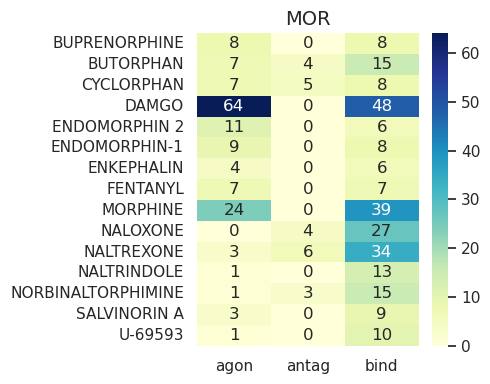

concat_df.shape for CHEMBL237: (6615, 50)


<Figure size 640x480 with 0 Axes>

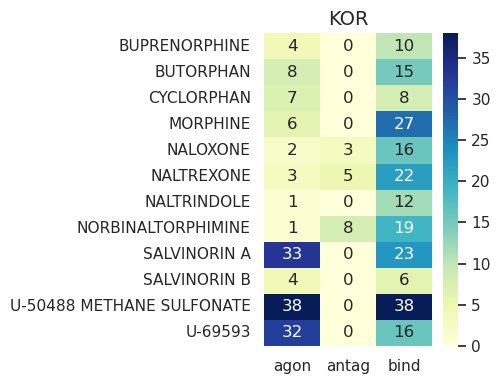

concat_df.shape for CHEMBL236: (6453, 50)


<Figure size 640x480 with 0 Axes>

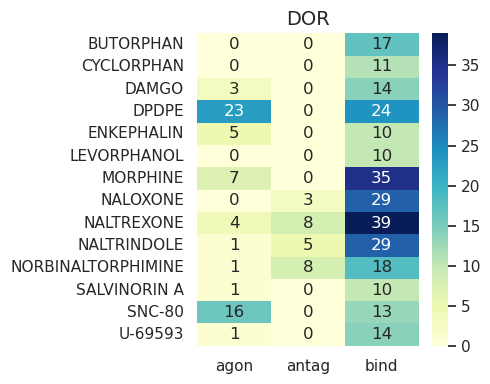

concat_df.shape for CHEMBL2014: (2104, 50)


<Figure size 640x480 with 0 Axes>

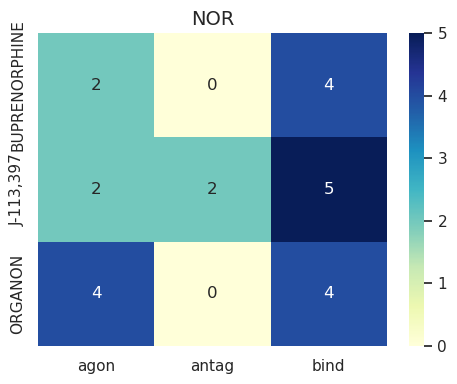

<Figure size 640x480 with 0 Axes>

In [8]:
def heatmap_dupMol_prefName(target='CHEMBL233', top_n=10):

    # get the target_effect(all effects for a target) dataset
    concat_df = pd.DataFrame()
    for f in os.listdir(os.path.join(CURA_MHD_effect_OR_DIR, 'rmvDupMol0')):
        if f.startswith(target):
            df = pd.read_csv(os.path.join(CURA_MHD_effect_OR_DIR, 'rmvDupMol0', f))
            concat_df = pd.concat([concat_df, df], ignore_index=True)
    print(f'concat_df.shape for {target}: {concat_df.shape}')

    # count the frequency of each pref_name
    counts = concat_df['pref_name'].value_counts()
    # keep only those with frequency >= top_n
    keep_idx = counts[counts >= top_n].index
    filtered_df = concat_df[concat_df['pref_name'].isin(keep_idx)]

    # create a crosstab (counts per effect)
    heatmap_data = pd.crosstab(filtered_df['pref_name'], filtered_df['effect'])

    # Plot the heatmap
    with sns.plotting_context("notebook", font_scale=1):
        plt.rcParams['font.family'] = 'DejaVu Sans'
        plt.figure(figsize=(5, 4))
        sns.heatmap(
            heatmap_data,
            annot=True,          # display the counts in each cell
            fmt="d",             # integer formatting
            cmap="YlGnBu",       # color map
            cbar_kws={'label': ''}
            )
        #plt.xlabel('Effect', fontsize=8)
        #plt.ylabel('Preferred Name', fontsize=8)
        plt.xlabel('')
        plt.ylabel('')
        plt.title(OR_chemblids_name[target].upper(), fontsize=14)
        plt.tight_layout()
        plt.show()

        save_path = os.path.join(CURA_FIG_DIR, 'heatmap')
        mkdirs(save_path)
        # save the figure
        plt.savefig(os.path.join(save_path, f'PrefName_effect_{target}.pdf'), dpi=300, bbox_inches='tight')

heatmap_dupMol_prefName(target='CHEMBL233', top_n=10)
heatmap_dupMol_prefName(target='CHEMBL237', top_n=10)
heatmap_dupMol_prefName(target='CHEMBL236', top_n=10)
heatmap_dupMol_prefName(target='CHEMBL2014', top_n=5)

#### histgram: distribution of pStandard_value for each dupMol

concat_df.shape for CHEMBL233: (8081, 50)
concat_df_rmv1.shape for CHEMBL233: (6719, 50)
len(vc): 134
len(vc_rmv1): 124
len(diff_col_values): 10
diff_col_values: ['ENKEPHALIN', 'MEPERIDINE HYDROCHLORIDE', 'AXELOPRAN SULFATE', 'CEBRANOPADOL', 'METHYLNALTREXONE', 'NALFURAFINE', 'METHYLNALTREXONE BROMIDE', 'CODEINE', 'AXELOPRAN', 'LOPERAMIDE']
diff_pref_names: ['ENKEPHALIN', 'MEPERIDINE HYDROCHLORIDE', 'AXELOPRAN SULFATE', 'CEBRANOPADOL', 'METHYLNALTREXONE', 'NALFURAFINE', 'METHYLNALTREXONE BROMIDE', 'CODEINE', 'AXELOPRAN', 'LOPERAMIDE']


/storage/homefs/yc24j783/miniconda3/envs/datacat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


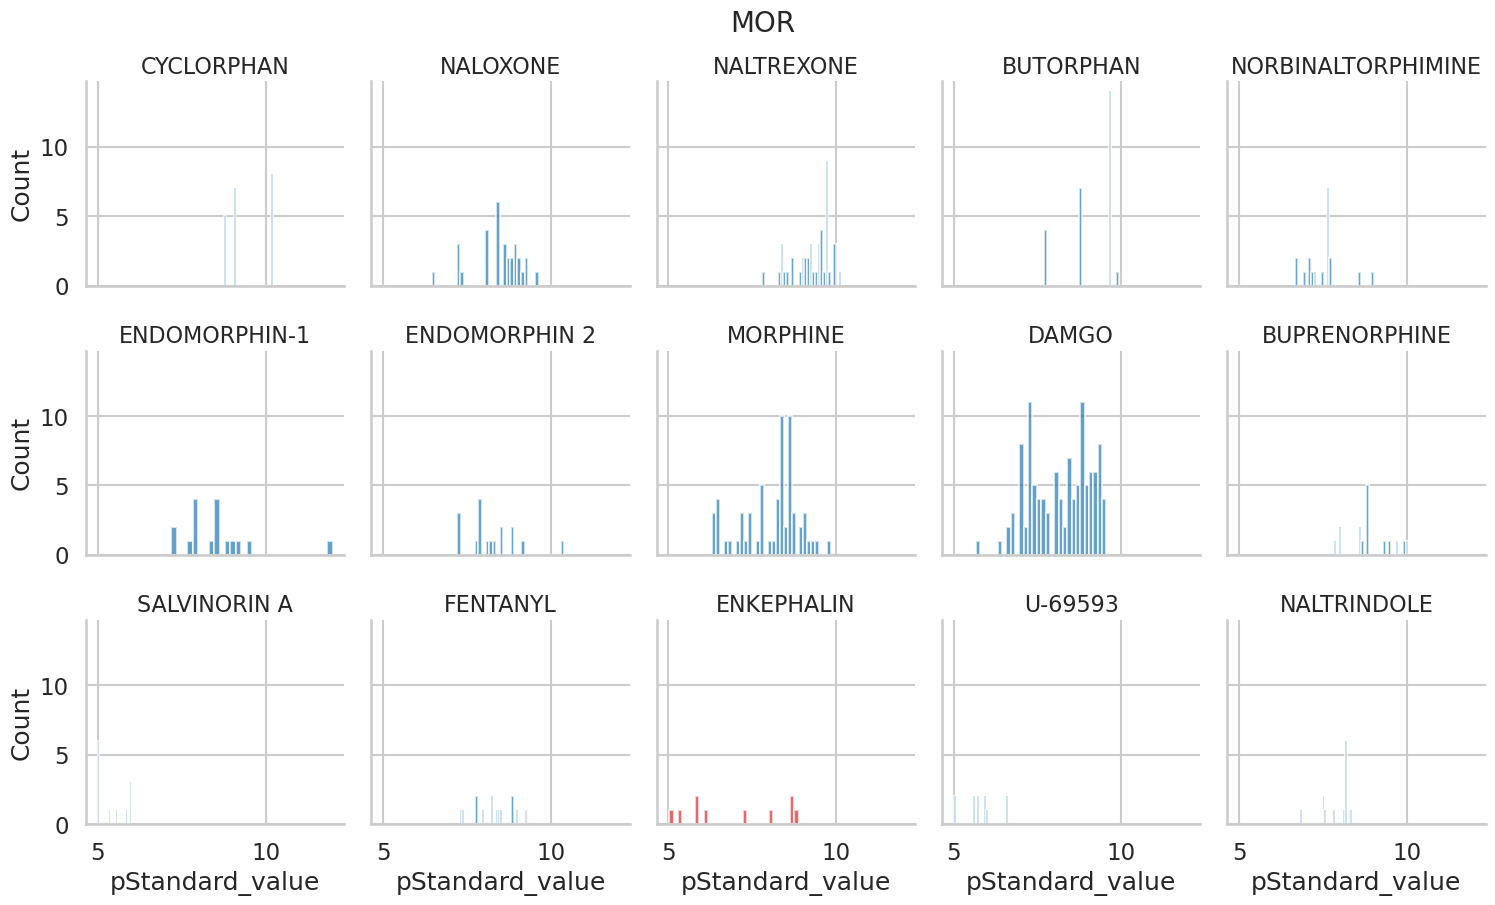

concat_df.shape for CHEMBL237: (6615, 50)
concat_df_rmv1.shape for CHEMBL237: (5637, 50)
len(vc): 130
len(vc_rmv1): 122
len(diff_col_values): 8
diff_col_values: ['OXYMORPHINDOLE CHLORIDE', 'METHYLNALTREXONE', 'DIFELIKEFALIN', 'NALFURAFINE', 'BUPRENORPHINE', 'NALFURAFINE HYDROCHLORIDE', 'SALVINORIN B', '(-)-U-50488 CHLORIDE']
diff_pref_names: ['OXYMORPHINDOLE CHLORIDE', 'METHYLNALTREXONE', 'DIFELIKEFALIN', 'NALFURAFINE', 'BUPRENORPHINE', 'NALFURAFINE HYDROCHLORIDE', 'SALVINORIN B', '(-)-U-50488 CHLORIDE']


/storage/homefs/yc24j783/miniconda3/envs/datacat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


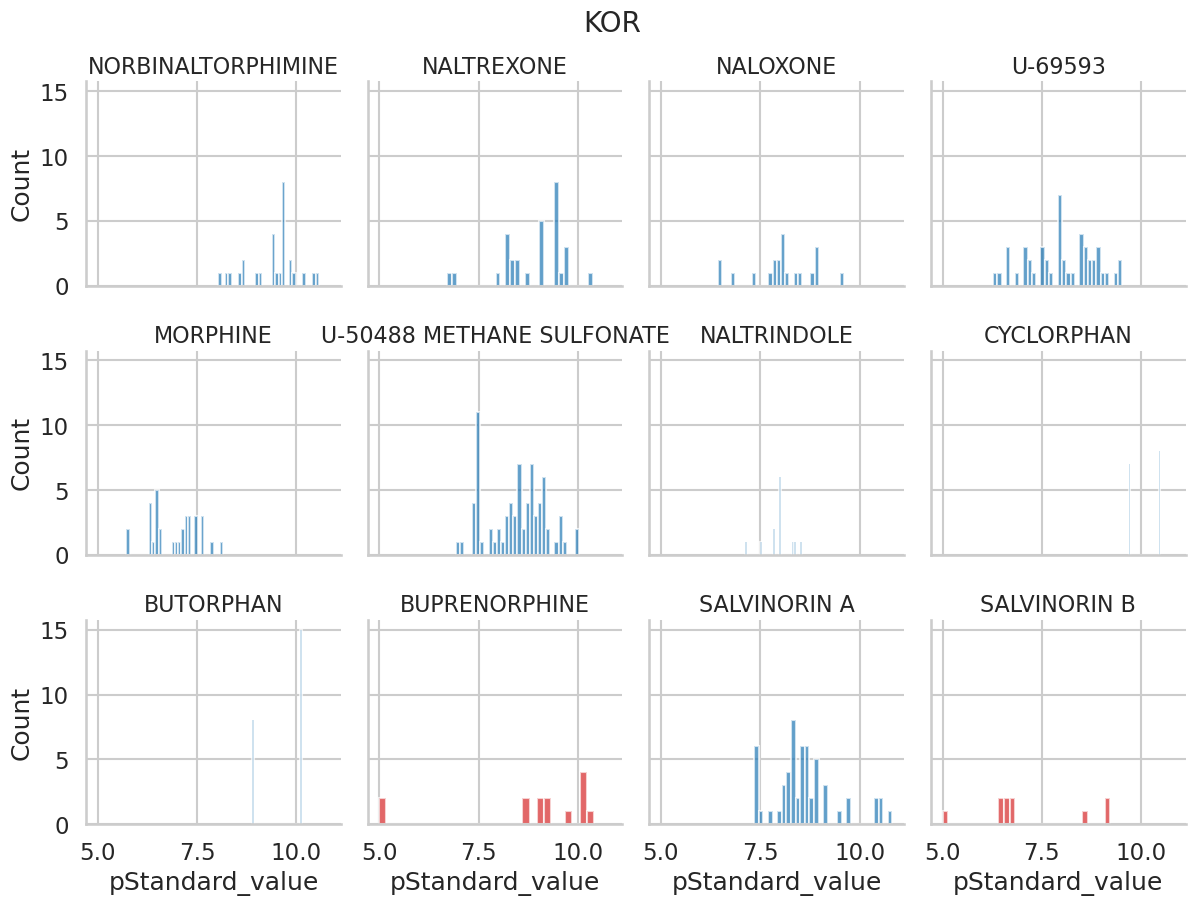

concat_df.shape for CHEMBL236: (6453, 50)
concat_df_rmv1.shape for CHEMBL236: (5432, 50)
len(vc): 136
len(vc_rmv1): 126
len(diff_col_values): 10
diff_col_values: ['DAMGO', 'AXELOPRAN SULFATE', 'CODEINE MONOHYDRATE', 'METHYLNALTREXONE', 'LEVORPHANOL HYDROCHLORIDE', 'METHYLNALTREXONE BROMIDE', 'MORPHINE SULFATE', 'AXELOPRAN', 'CYPRODIME BROMIDE', 'BUPRENORPHINE HYDROCHLORIDE']
diff_pref_names: ['DAMGO', 'AXELOPRAN SULFATE', 'CODEINE MONOHYDRATE', 'METHYLNALTREXONE', 'LEVORPHANOL HYDROCHLORIDE', 'METHYLNALTREXONE BROMIDE', 'MORPHINE SULFATE', 'AXELOPRAN', 'CYPRODIME BROMIDE', 'BUPRENORPHINE HYDROCHLORIDE']


/storage/homefs/yc24j783/miniconda3/envs/datacat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


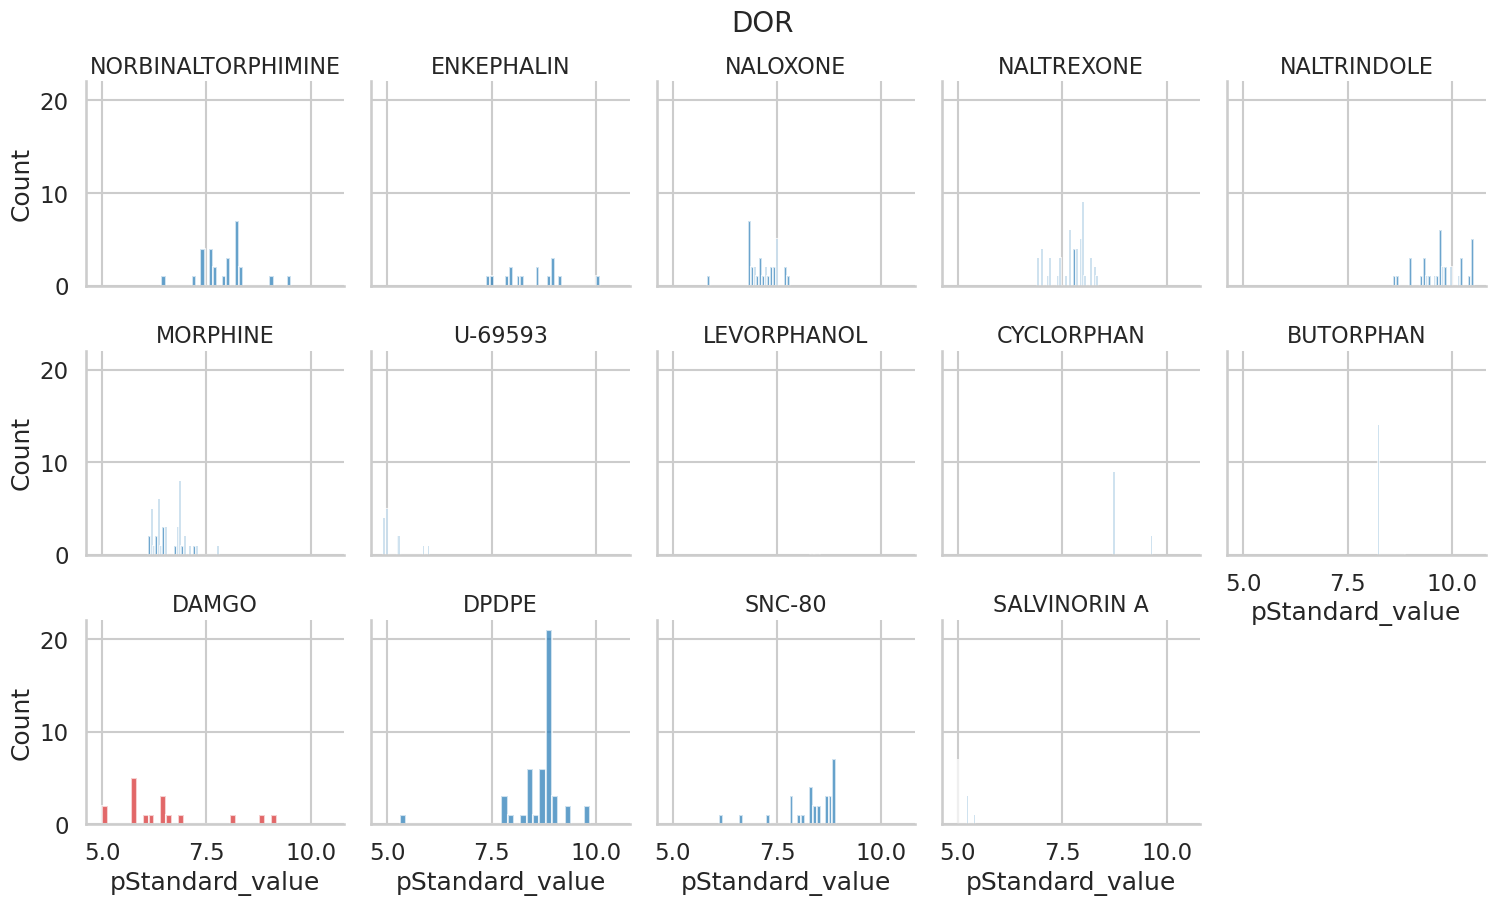

concat_df.shape for CHEMBL2014: (2104, 50)
concat_df_rmv1.shape for CHEMBL2014: (1916, 50)
len(vc): 17
len(vc_rmv1): 16
len(diff_col_values): 1
diff_col_values: ['CEBRANOPADOL']
diff_pref_names: ['CEBRANOPADOL']


/storage/homefs/yc24j783/miniconda3/envs/datacat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


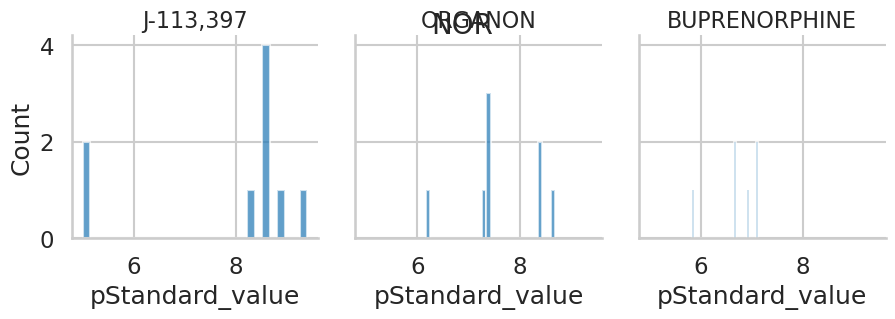

In [9]:
def plot_diff_col_values(df, df_rmv1, col='pref_name', plot_diff=False):

    vc = df[col].value_counts()
    print(f'len(vc): {len(vc)}')
    col_values = vc.index.tolist()
    #print(f'col: {col_values}')

    vc_rmv1 = df_rmv1[col].value_counts()
    print(f'len(vc_rmv1): {len(vc_rmv1)}')
    col_values_rmv1 = vc_rmv1.index.tolist()
    #print(f'col_values_rmv1: {col_values_rmv1}')

    # get the difference between col_values and col_values_rmv1
    diff_col_values = list(set(col_values) - set(col_values_rmv1))
    print(f'len(diff_col_values): {len(diff_col_values)}')
    print(f'diff_col_values: {diff_col_values}')

    # plot the distribution of the diff_col_values in df
    if plot_diff:
        for n in diff_col_values:
            df[df[col]==n]['pStandard_value'].hist(bins=30)
            plt.title(n)
            plt.show()
    
    return diff_col_values

def histgram_dupMol_pStandard_value(target='CHEMBL233', top_n=10, col_wrap=5):
    # get the target_effect(all effects for a target) dataset
    concat_df = pd.DataFrame()
    for f in os.listdir(os.path.join(CURA_MHD_effect_OR_DIR, 'rmvDupMol0')):
        if f.startswith(target):
            df = pd.read_csv(os.path.join(CURA_MHD_effect_OR_DIR, 'rmvDupMol0', f))
            concat_df = pd.concat([concat_df, df], ignore_index=True)
    print(f'concat_df.shape for {target}: {concat_df.shape}')

    concat_df_rmv1 = pd.DataFrame()
    for f in os.listdir(os.path.join(CURA_MHD_effect_OR_DIR, 'rmvDupMol1')):
        if f.startswith(target):
            df = pd.read_csv(os.path.join(CURA_MHD_effect_OR_DIR, 'rmvDupMol1', f))
            concat_df_rmv1 = pd.concat([concat_df_rmv1, df], ignore_index=True)
    print(f'concat_df_rmv1.shape for {target}: {concat_df_rmv1.shape}')

    # get the diff pref_name between concat_df and concat_df_rmv1
    diff_pref_names = plot_diff_col_values(concat_df, concat_df_rmv1, col='pref_name', plot_diff=False)
    print(f'diff_pref_names: {diff_pref_names}')

    # count the frequency of each pref_name
    counts = concat_df['pref_name'].value_counts()
    # keep only those with frequency >= top_n
    keep_idx = counts[counts >= top_n].index
    filtered_df = concat_df[concat_df['pref_name'].isin(keep_idx)]

    # Custom plotting function
    def hist_with_color(data, color=None, **kwargs):
        pref = data['pref_name'].iloc[0]
        if pref in diff_pref_names:
            c = "tab:red"  # color for pref_names removed by rmvDupMol1
        else:
            c = "tab:blue"  # color for others
        plt.hist(data["pStandard_value"], bins=30, color=c, alpha=0.7)

    # plot the histgram of pStandard_value for each pref_name
    g = sns.FacetGrid(filtered_df, col='pref_name', col_wrap=col_wrap, sharex=True, sharey=True)
    #g.map(plt.hist, 'pStandard_value', bins=30)
    g.map_dataframe(hist_with_color)
    g.set_titles(col_template="{col_name}", size=16)
    g.set_axis_labels("pStandard_value", "Count")
    plt.subplots_adjust(top=0.9) # adjust the top to make space for suptitle
    #g.fig.suptitle(f'pStandard_value Distribution for dupMols in {OR_chemblids_name[target].upper()}', fontsize=14)
    g.fig.suptitle(f'{OR_chemblids_name[target].upper()}', fontsize=20, ha='center')
    plt.show()

    save_path = os.path.join(CURA_FIG_DIR, 'histgram_dupMol_pStandard_value')
    mkdirs(save_path)
    # save the figure
    g.savefig(os.path.join(save_path, f'histgram_dupMol_pStandard_value_{target}.pdf'), dpi=300, bbox_inches='tight')

histgram_dupMol_pStandard_value(target='CHEMBL233', top_n=10, col_wrap=5)
histgram_dupMol_pStandard_value(target='CHEMBL237', top_n=10, col_wrap=4)
histgram_dupMol_pStandard_value(target='CHEMBL236', top_n=10, col_wrap=5)
histgram_dupMol_pStandard_value(target='CHEMBL2014', top_n=5, col_wrap=3)

### 2D structure of SMILES before and after curation

In [ ]:
#display_2d_in_df(df = cura_lhd_or_f_smi, slice_start=70, slice_end=90)

### Stereochemical siblings

In [ ]:
from datacat4ml.Scripts.data_prep.data_split.ml_data_split import find_stereochemical_siblings

pair_smis, pair_idx = find_stereochemical_siblings(cura_lhd_or_f['canonical_smiles'].tolist())

display_2d_smi(pair_smis[0])

### all numeric columns

In [ ]:
# The data type of each column
num_cols_4each_file = ['max_molecular_weight', 'max_num_atoms', 'threshold']
num_cols_4each_comp = ['molecular_weight', 'num_atoms', 'pStandard_value', 'activity']

#### 'molecular_weight'

In [ ]:
def histplot_MW(ds_df, ds_type='or'):

    # initialize the fig
    plt.figure(figsize=(4, 2))
    plt.rcParams["font.family"] = "DejaVu Sans"

    # set color based on ds_type
    if ds_type == 'or':
        color = '#03045e' # purple
    elif ds_type == 'gpcr':
        color = '#677bab'  # light purple

    # plot a hisgram of 'molecular_weight'
    sns.displot(data=ds_df, 
                x='pStandard_value', 
                color=color, 
                kde=True, 
                binrange=(4, 6),
                linewidth=0 # remove the border line
                )
    
    # set x, y and title
    plt.xticks(ticks=plt.xticks()[0], labels=[f'{x:.1f}' for x in plt.xticks()[0]]) # set the decimal places of x-axis ticks to 1
    plt.xlabel('Molecular Weight')
    plt.title(f'Molecular Weight Distribution ({ds_type.upper()})')

    # save the figure
    plt.savefig(os.path.join(CURA_FIG_DIR, f'molecular_weight_distribution_{ds_type.upper()}.pdf'), dpi=300, bbox_inches='tight')

histplot_MW(ds_df=cura_lhd_or_f, ds_type='or')

# Split

## stats

In [2]:
def style_stats_df(stats_file = 'spl_mhd_or_stats.csv'):

    # read the stats file
    df = pd.read_csv(os.path.join(SPL_DATA_DIR, stats_file)).fillna('None')

    # get the spl columns
    spl_cols = df.iloc[:, -8:].columns.tolist()
    rmv0_cols = [col for col in spl_cols if col.__contains__('rmvStereo0')]
    rmv1_cols = [col for col in spl_cols if col.__contains__('rmvStereo1')]

    # get rmv0 and rmv1 dfs
    df['id'] = df['target_chembl_id'] + '_' + df['effect'] + '_' + df['assay'] + '_' + df['standard_type'] + '_' + df['assay_chembl_id']

    rmv0_df = df[['id'] + rmv0_cols]
    rmv1_df = df[['id'] + rmv1_cols]

    # keep rows with any value <5
    rmv0_df = rmv0_df[(rmv0_df[rmv0_cols] < 5).any(axis=1)].sort_values(by='id').reset_index(drop=True)
    rmv1_df = rmv1_df[(rmv1_df[rmv1_cols] < 5).any(axis=1)].sort_values(by='id').reset_index(drop=True)

    # build styled dfs
    styled_rmv0=rmv0_df.style.background_gradient(subset=rmv0_cols, cmap="Blues_r", vmin=0, vmax=5)
    styled_rmv1=rmv1_df.style.background_gradient(subset=rmv1_cols, cmap="Blues_r", vmin=0, vmax=5)

    # display the dfs
    display(styled_rmv0)
    display(styled_rmv1)

    # save styled dfs to PNG
    save_path = os.path.join(SPL_FIG_DIR, 'styled_stats')
    mkdirs(save_path)
    styled_rmv0.to_html(os.path.join(save_path, f'{stats_file.replace("_stats.csv", "")}_rmvStereo0.html'))
    styled_rmv1.to_html(os.path.join(save_path, f'{stats_file.replace("_stats.csv", "")}_rmvStereo1.html'))

In [3]:
style_stats_df(stats_file = 'spl_mhd_or_rmvDupMol0_stats.csv')
style_stats_df(stats_file = 'spl_mhd_or_rmvDupMol1_stats.csv')

style_stats_df(stats_file = 'spl_lhd_or_rmvDupMol0_stats.csv')
style_stats_df(stats_file = 'spl_lhd_or_rmvDupMol1_stats.csv')

,id,rmvStereo0_rs_lo,rmvStereo0_rs_vs,rmvStereo0_cs,rmvStereo0_ch
0,CHEMBL2014_agon_B-arrest_EC50_None,0,0,0,0
1,CHEMBL2014_agon_G-Ca_EC50_None,4,3,5,1
2,CHEMBL2014_agon_G-cAMP_EC50_None,0,0,0,0
3,CHEMBL2014_agon_G-cAMP_IC50_None,5,5,5,2
4,CHEMBL2014_antag_G-GTP_IC50_None,5,4,5,4
5,CHEMBL2014_antag_G-GTP_Ki_None,0,0,4,1
6,CHEMBL233_agon_G-cAMP_IC50_None,5,4,5,4
7,CHEMBL233_antag_G-GTP_Ki_None,5,5,5,4
8,CHEMBL236_agon_B-arrest_EC50_None,5,2,5,2
9,CHEMBL236_agon_G-Ca_EC50_None,5,5,5,3


,id,rmvStereo1_rs_lo,rmvStereo1_rs_vs,rmvStereo1_cs,rmvStereo1_ch
0,CHEMBL2014_agon_B-arrest_EC50_None,0,0,0,0
1,CHEMBL2014_agon_G-Ca_EC50_None,0,3,0,0
2,CHEMBL2014_agon_G-cAMP_EC50_None,0,0,0,0
3,CHEMBL2014_agon_G-cAMP_IC50_None,5,5,5,2
4,CHEMBL2014_antag_G-GTP_IC50_None,5,3,5,4
5,CHEMBL2014_antag_G-GTP_Ki_None,0,0,4,1
6,CHEMBL233_agon_G-cAMP_IC50_None,5,3,5,4
7,CHEMBL233_antag_B-arrest_IC50_None,5,5,5,3
8,CHEMBL233_antag_G-GTP_IC50_None,5,5,5,4
9,CHEMBL236_agon_B-arrest_EC50_None,5,5,5,1


,id,rmvStereo0_rs_lo,rmvStereo0_rs_vs,rmvStereo0_cs,rmvStereo0_ch
0,CHEMBL2014_agon_G-Ca_EC50_None,4,3,5,1
1,CHEMBL2014_agon_G-cAMP_EC50_None,0,0,0,0
2,CHEMBL2014_agon_G-cAMP_IC50_None,5,5,5,2
3,CHEMBL2014_antag_G-GTP_IC50_None,5,4,5,4
4,CHEMBL2014_antag_G-GTP_Ki_None,0,0,4,1
5,CHEMBL233_agon_G-cAMP_IC50_None,5,4,5,4
6,CHEMBL233_antag_G-GTP_Ki_None,5,5,5,4
7,CHEMBL236_agon_B-arrest_EC50_None,5,0,5,1
8,CHEMBL236_agon_G-Ca_EC50_None,5,5,5,4
9,CHEMBL236_agon_G-cAMP_EC50_None,5,5,5,4


,id,rmvStereo1_rs_lo,rmvStereo1_rs_vs,rmvStereo1_cs,rmvStereo1_ch
0,CHEMBL2014_agon_G-Ca_EC50_None,0,3,0,0
1,CHEMBL2014_agon_G-cAMP_EC50_None,0,0,0,0
2,CHEMBL2014_agon_G-cAMP_IC50_None,5,5,5,2
3,CHEMBL2014_antag_G-GTP_IC50_None,5,3,5,4
4,CHEMBL2014_antag_G-GTP_Ki_None,0,0,4,1
5,CHEMBL233_agon_G-cAMP_IC50_None,5,4,5,4
6,CHEMBL233_antag_B-arrest_IC50_None,5,5,5,3
7,CHEMBL233_antag_G-GTP_IC50_None,5,5,5,4
8,CHEMBL236_agon_B-arrest_EC50_None,5,0,5,1
9,CHEMBL236_agon_G-Ca_EC50_None,5,5,5,2


,id,rmvStereo0_rs_lo,rmvStereo0_rs_vs,rmvStereo0_cs,rmvStereo0_ch
0,CHEMBL2014_bind_RBA_IC50_CHEMBL867087,5,5,5,1
1,CHEMBL2014_bind_RBA_Ki_CHEMBL1030622,5,5,5,1
2,CHEMBL2014_bind_RBA_Ki_CHEMBL3888830,5,5,5,2
3,CHEMBL2014_bind_RBA_Ki_CHEMBL888952,5,0,5,1
4,CHEMBL2014_bind_RBA_Ki_CHEMBL892111,5,5,5,1
5,CHEMBL233_agon_G-GTP_EC50_CHEMBL3887793,5,5,5,1
6,CHEMBL233_agon_G-GTP_EC50_CHEMBL3888720,5,5,5,1
7,CHEMBL233_agon_G-GTP_EC50_CHEMBL4201551,5,3,5,1
8,CHEMBL233_agon_G-cAMP_EC50_CHEMBL4356649,5,5,5,1
9,CHEMBL233_antag_G-GTP_IC50_CHEMBL909298,5,5,5,1


,id,rmvStereo1_rs_lo,rmvStereo1_rs_vs,rmvStereo1_cs,rmvStereo1_ch
0,CHEMBL2014_bind_RBA_IC50_CHEMBL867087,5,5,5,1
1,CHEMBL2014_bind_RBA_Ki_CHEMBL1030622,5,5,5,1
2,CHEMBL2014_bind_RBA_Ki_CHEMBL3888830,5,5,5,1
3,CHEMBL2014_bind_RBA_Ki_CHEMBL888952,5,0,5,1
4,CHEMBL2014_bind_RBA_Ki_CHEMBL892111,5,5,5,1
5,CHEMBL233_agon_G-GTP_EC50_CHEMBL3887793,5,5,5,1
6,CHEMBL233_agon_G-GTP_EC50_CHEMBL3888720,5,5,5,1
7,CHEMBL233_agon_G-GTP_EC50_CHEMBL4201551,5,0,5,1
8,CHEMBL233_agon_G-cAMP_EC50_CHEMBL4356649,5,5,5,1
9,CHEMBL233_antag_G-GTP_IC50_CHEMBL909298,5,5,5,1


,id,rmvStereo0_rs_lo,rmvStereo0_rs_vs,rmvStereo0_cs,rmvStereo0_ch
0,CHEMBL2014_bind_RBA_IC50_CHEMBL867087,5,5,5,1
1,CHEMBL2014_bind_RBA_Ki_CHEMBL1030622,5,5,5,1
2,CHEMBL2014_bind_RBA_Ki_CHEMBL3888830,5,5,5,1
3,CHEMBL2014_bind_RBA_Ki_CHEMBL888952,5,0,5,1
4,CHEMBL2014_bind_RBA_Ki_CHEMBL892111,5,5,5,1
5,CHEMBL233_agon_G-GTP_EC50_CHEMBL3887793,5,5,5,1
6,CHEMBL233_agon_G-GTP_EC50_CHEMBL3888720,5,5,5,1
7,CHEMBL233_agon_G-GTP_EC50_CHEMBL4201551,5,3,5,1
8,CHEMBL233_agon_G-cAMP_EC50_CHEMBL4356649,5,5,5,1
9,CHEMBL233_antag_G-GTP_IC50_CHEMBL909298,5,5,5,1


,id,rmvStereo1_rs_lo,rmvStereo1_rs_vs,rmvStereo1_cs,rmvStereo1_ch
0,CHEMBL2014_bind_RBA_IC50_CHEMBL867087,5,5,5,1
1,CHEMBL2014_bind_RBA_Ki_CHEMBL1030622,5,5,5,1
2,CHEMBL2014_bind_RBA_Ki_CHEMBL3888830,5,5,5,1
3,CHEMBL2014_bind_RBA_Ki_CHEMBL888952,5,0,5,1
4,CHEMBL2014_bind_RBA_Ki_CHEMBL892111,5,5,5,1
5,CHEMBL233_agon_G-GTP_EC50_CHEMBL3887793,5,5,5,1
6,CHEMBL233_agon_G-GTP_EC50_CHEMBL3888720,5,5,5,1
7,CHEMBL233_agon_G-GTP_EC50_CHEMBL4201551,5,0,5,1
8,CHEMBL233_agon_G-cAMP_EC50_CHEMBL4356649,5,5,5,1
9,CHEMBL233_antag_G-GTP_IC50_CHEMBL909298,5,5,5,1


## sinlg files

### Internal split

### aligned split

#### compute coverage statistics

In [4]:
from datacat4ml.Scripts.data_prep.data_split.alnSplit_mldata import dir_name_dict, get_pf_cfs_pairs

#------------------------------------------------------------
# 1. Compute coverage statistics
#------------------------------------------------------------
def compute_test_overlap(pf_cfs_pairs, rmv_dupMol=1):
    """
    Compute overlap between parent and child activity_id sets.

    Returns a DataFrame summarizing:
        parent, child, parent_file, child_file, 
        parent_count, child_count, intersection_count,
        coverage (child in parent), inclusion (parent in child)
    """

    overlap_records = []

    for (parent, child), pf_cfs_map in pf_cfs_pairs.items():
        pf_path = os.path.join(dir_name_dict[parent], f'rmvDupMol{rmv_dupMol}')
        cf_path = os.path.join(dir_name_dict[child], f'rmvDupMol{rmv_dupMol}')

        print(f"\nComputing overlaps for parent='{parent}', child='{child}' ...")

        for pf, cfs in pf_cfs_map.items():
            pf_df = pd.read_csv(os.path.join(pf_path, pf))
            pf_basename = pf[:-22] # remove '_mhd_b50_b50_split.csv' suffix

            for cf in cfs:
                cf_basename = cf[:-22] # remove '_lhd_b50_b50_curated.csv' suffix
                cf_df = pd.read_csv(os.path.join(cf_path, cf))
                cf_df_cols = [c for c in cf_df.columns if c.__contains__('fold')]

                for col in cf_df_cols:
                    col_basename = col.split('.')[1] # get the part e.g. 'rmvStereo0_rs_lo_fold0', remove the part 'int.'
                    parent_col = f"aln.{parent}-{child}.{cf_basename}.{col_basename}"

                    if parent_col not in pf_df.columns:
                        print(f"Missing parent column: {parent_col}")
                        continue
                    
                    # extract 'test' activity_ids from both parent and child
                    parent_ids = set(pf_df.loc[pf_df[parent_col] == 'test', 'activity_id'])
                    child_ids = set(cf_df.loc[cf_df[col] == 'test', 'activity_id'])

                    # compute intersection and coverage metrics
                    inter = parent_ids & child_ids
                    only_parent = parent_ids - child_ids
                    only_child = child_ids - parent_ids

                    coverage = len(inter) / len(child_ids) if len(child_ids) > 0 else 0
                    inclusion = len(inter) / len(parent_ids) if len(parent_ids) > 0 else 0

                    overlap_records.append({
                        "parent": parent,
                        "child": child,
                        "parent_file": pf_basename,
                        "child_file": cf_basename,
                        'col': col_basename,
                        "parent_count": len(parent_ids),
                        "child_count": len(child_ids),
                        "intersection_count": len(inter),
                        "coverage_child_in_parent": coverage,
                        "inclusion_parent_in_child": inclusion,
                        "unique_to_parent": len(only_parent),
                        "unique_to_child": len(only_child),
                    })

    overlap_df = pd.DataFrame(overlap_records)
    return overlap_df

pf_cfs_pairs_0 = get_pf_cfs_pairs(rmv_dupMol=0)
overlap_df0 = compute_test_overlap(pf_cfs_pairs_0, rmv_dupMol=0)

pf_cfs_pairs_1 = get_pf_cfs_pairs(rmv_dupMol=1)
overlap_df1 = compute_test_overlap(pf_cfs_pairs_1, rmv_dupMol=1)


parent_child_pairs is 
[('hhd', 'mhd'), ('hhd', 'lhd'), ('mhd-effect', 'mhd'), ('mhd-effect', 'lhd'), ('mhd', 'lhd')]

Computing overlaps for parent='hhd', child='mhd' ...


/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:30: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  cf_df = pd.read_csv(os.path.join(cf_path, cf))


Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent colum

/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:30: DtypeWarning: Columns (12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  cf_df = pd.read_csv(os.path.join(cf_path, cf))


Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent colum

/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:30: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  cf_df = pd.read_csv(os.path.join(cf_path, cf))


Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent colum

/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))



Computing overlaps for parent='mhd-effect', child='mhd' ...
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL

/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:30: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  cf_df = pd.read_csv(os.path.join(cf_path, cf))


Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd

/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:30: DtypeWarning: Columns (12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  cf_df = pd.read_csv(os.path.join(cf_path, cf))


Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd

/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:30: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  cf_df = pd.read_csv(os.path.join(cf_path, cf))


Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd

/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))



Computing overlaps for parent='mhd', child='lhd' ...


/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))


parent_child_pairs is 
[('hhd', 'mhd'), ('hhd', 'lhd'), ('mhd-effect', 'mhd'), ('mhd-effect', 'lhd'), ('mhd', 'lhd')]

Computing overlaps for parent='hhd', child='mhd' ...


/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:30: DtypeWarning: Columns (12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  cf_df = pd.read_csv(os.path.join(cf_path, cf))


Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent colum

/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:30: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  cf_df = pd.read_csv(os.path.join(cf_path, cf))


Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent colum

/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:30: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  cf_df = pd.read_csv(os.path.join(cf_path, cf))


Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.hhd-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent colum

/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))



Computing overlaps for parent='mhd-effect', child='mhd' ...
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_agon_G-GTP_EC50_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL

/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:30: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  cf_df = pd.read_csv(os.path.join(cf_path, cf))


Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL236_bind_RBA_Ki_None.mhd-lhd

/tmp/ipykernel_686509/3970009937.py:30: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  cf_df = pd.read_csv(os.path.join(cf_path, cf))


Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL237_bind_RBA_Ki_None.mhd-lhd

/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:30: DtypeWarning: Columns (12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  cf_df = pd.read_csv(os.path.join(cf_path, cf))


Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd
Missing parent column: aln.mhd-effect-mhd.CHEMBL233_bind_RBA_Ki_None.mhd-lhd

/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))



Computing overlaps for parent='mhd', child='lhd' ...


/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))
/tmp/ipykernel_686509/3970009937.py:25: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  pf_df = pd.read_csv(os.path.join(pf_path, pf))


#### overlap_hisgrams

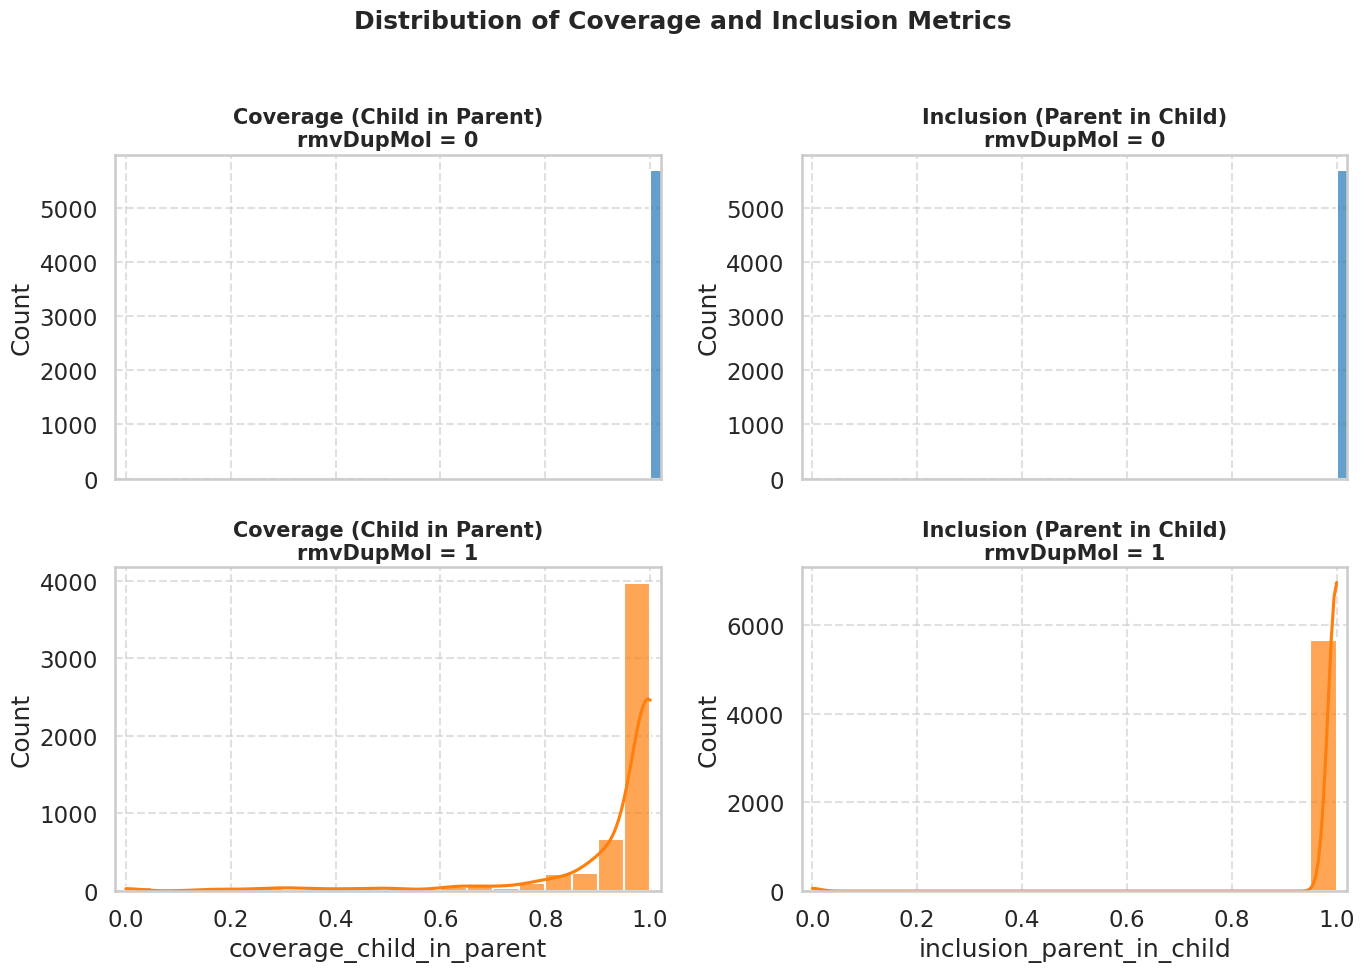

In [5]:
def plot_overlap_histograms(overlap_df0, overlap_df1):
    sns.set(style="whitegrid", context="talk")

    plt.rcParams["font.family"] = "DejaVu Sans"
    
    metrics = [
        ("coverage_child_in_parent", "Coverage (Child in Parent)"),
        ("inclusion_parent_in_child", "Inclusion (Parent in Child)")
    ]

    fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
    rmv_settings = [(overlap_df0, "rmvDupMol = 0", "#1f77b4"),
                    (overlap_df1, "rmvDupMol = 1", "#ff7f0e")]

    for row_idx, (df, rmv_label, color) in enumerate(rmv_settings):
        for col_idx,  (metric, metric_title) in enumerate(metrics):
            ax = axes[row_idx, col_idx]
            sns.histplot(
                df[metric],
                bins=20,
                color=color,
                kde=True,
                ax=ax,
                alpha=0.7
            )
            ax.set_title(f"{metric_title}\n{rmv_label}", fontsize=15, weight='bold')
            ax.set_xlabel(metric)
            ax.set_ylabel("Count")
            ax.set_xlim(-0.02, 1.02)
            ax.grid(True, linestyle="--", alpha=0.6)

    plt.suptitle("Distribution of Coverage and Inclusion Metrics", fontsize=18, weight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    save_path = os.path.join(SPL_FIG_DIR, 'test_overlap')
    mkdirs(save_path)
    # save the figure
    plt.savefig(os.path.join(save_path, f'test_overlap_histograms.pdf'), dpi=300, bbox_inches='tight')

plot_overlap_histograms(overlap_df0, overlap_df1)

#### overlap heatmap

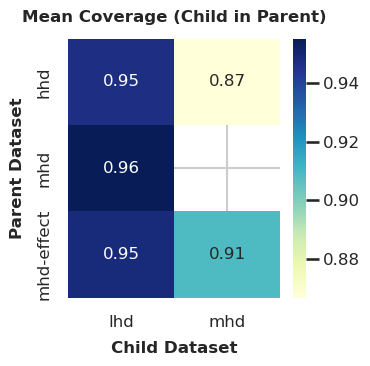

In [6]:
#--------------------------------------------------------
# 2. Plot heatmap (aggregated by parent-child pair) 
#    => only for overlap_df1/"coverage_child_in_parent"
#--------------------------------------------------------
def plot_overlap_heatmaps(overlap_df, col="coverage_child_in_parent"):
    """
    Plot heatmaps showing average overlap metrics (coverage/inclusion)
    between parent-child dataset pairs.

    Parameters
    ----------
    overlap_df : pd.DataFrame
        Output from `compute_test_overlap()`
    col : str
        Column in overlap_df to visualize (default: "coverage_child_in_parent")
    """

    # Aggregate across all files and folds
    pivot_df = overlap_df.groupby(["parent", "child"], as_index=False)[col].mean()
    pivot_table = pivot_df.pivot(index="parent", columns="child", values=col)

    # Plot heatmap
    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(
        pivot_table,
        annot=True,
        cmap="YlGnBu",
        fmt=".2f",
        annot_kws={"size": 12},  # font size of numbers inside the heatmap
        cbar_kws={'label': ''}
    )

    # Font family
    plt.rcParams["font.family"] = "DejaVu Sans"

    # Title and labels
    ax.set_title(
        f"Mean Coverage (Child in Parent)",
        fontsize=12, weight='bold', pad=12
    )
    ax.set_xlabel("Child Dataset", fontsize=12, weight='bold', labelpad=8)
    ax.set_ylabel("Parent Dataset", fontsize=12, weight='bold', labelpad=8)

    # Tick label sizes
    ax.tick_params(axis='x', labelrotation=0, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # Colorbar label font size
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    #cbar.set_label(col.replace('_', ' ').title(), fontsize=12, weight='bold')

    plt.tight_layout()
    save_path = os.path.join(SPL_FIG_DIR, 'test_overlap')
    mkdirs(save_path)
    # save the figure
    plt.savefig(os.path.join(save_path, f'test_overlap_heatmap_catLevel.pdf'), dpi=300, bbox_inches='tight')
    plt.show()

plot_overlap_heatmaps(overlap_df1, col="coverage_child_in_parent")

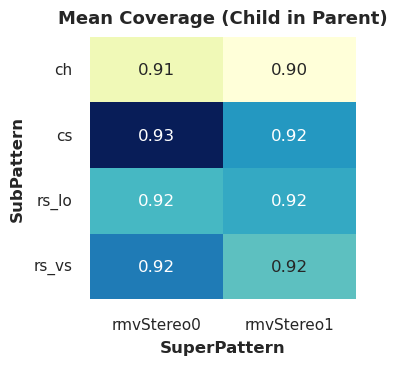

In [7]:
def plot_stereo_heatmap(overlap_df, value_col="coverage_child_in_parent"):
    """
    Create a heatmap showing mean coverage across super/sub pattern combinations.

    Parameters
    ----------
    overlap_df : pd.DataFrame
        DataFrame from compute_test_overlap()
    value_col : str
        Column to average (default: "coverage_child_in_parent")
    """

    # --- 1️⃣ Extract superpattern and subpattern from the 'col' column ---
    df = overlap_df.copy()
    df["superpattern"] = df["col"].apply(lambda x: x.split('_')[0])  # rmvStereo0 or rmvStereo1
    df["subpattern"] = df["col"].apply(lambda x: '_'.join(x.split('_')[1:]))  # rs_lo, rs_vs, cs, ch
    df["subpattern_short"] = df["subpattern"].apply(lambda x: x[:-6]) # remove '_fold0' suffix if present

    ## calculate mean coverage for each (super, sub) pair
    #df["mean_coverage"] = df.groupby(["superpattern", "subpattern_short"])[value_col].transform("mean")

    # --- 2️⃣ Compute mean coverage for each (super, sub) pair ---
    agg_df = (
        df.groupby(["subpattern_short", "superpattern"], as_index=False)[value_col]
        .mean()
    )

    # --- 3️⃣ Pivot table for heatmap ---
    pivot_table = agg_df.pivot(index="subpattern_short", columns="superpattern", values=value_col)

    # --- 4️⃣ Plot heatmap ---
    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(
        pivot_table,
        annot=True,
        cmap="YlGnBu",
        fmt=".2f",
        annot_kws={"size": 12},
        cbar=False  # hide colorbar for simplicity
    )

    plt.rcParams["font.family"] = "DejaVu Sans"
    ax.set_title("Mean Coverage (Child in Parent)", fontsize=13, weight='bold', pad=10)
    ax.set_xlabel("SuperPattern", fontsize=12, weight='bold', labelpad=6)
    ax.set_ylabel("SubPattern", fontsize=12, weight='bold', labelpad=6)

    ax.tick_params(axis='x', labelrotation=0, labelsize=11)
    ax.tick_params(axis='y', labelrotation=0, labelsize=11)

    plt.tight_layout()

    save_path = os.path.join(SPL_FIG_DIR, 'test_overlap')
    mkdirs(save_path)
    # save the figure
    plt.savefig(os.path.join(save_path, f'test_overlap_heatmap_pattern.pdf'), dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
plot_stereo_heatmap(overlap_df1)

In [ ]:
#------------------------------------------------------------
# 3. Plot example Venn diagrams
#------------------------------------------------------------
def plot_example_venn_old(overlap_df, pf_cfs_pairs, rmv_dupMol=1, n_pairs=3):
    """
    Draw Venn diagrams for up to n_pairs examples of parent-child file overlaps.
    """
    plotted = 0
    for (parent, child), pf_cfs_map in pf_cfs_pairs.items():
        pf_path = os.path.join(dir_name_dict[parent], f'rmvDupMol{rmv_dupMol}')
        cf_path = os.path.join(dir_name_dict[child], f'rmvDupMol{rmv_dupMol}')

        for pf, cfs in pf_cfs_map.items():
            for cf in cfs:
                if plotted >= n_pairs:
                    return

                pf_df = pd.read_csv(os.path.join(pf_path, pf))
                cf_df = pd.read_csv(os.path.join(cf_path, cf))

                parent_ids = set(pf_df["activity_id"])
                child_ids = set(cf_df["activity_id"])
                inter = parent_ids & child_ids

                venn2(
                    subsets=(len(parent_ids - child_ids),
                             len(child_ids - parent_ids),
                             len(inter)),
                    set_labels=(f"{parent}\n({len(parent_ids)})",
                                f"{child}\n({len(child_ids)})")
                )
                plt.title(f"{parent}-{child}\nOverlap: {len(inter)} shared")
                plt.show()
                plotted += 1
def plot_example_venn(overlap_df, pf_cfs_pairs, dir_name_dict, rmv_dupMol=1, new_col_prefix="new_cols", n_pairs=3):
    plotted = 0
    for (parent, child), pf_cfs_map in pf_cfs_pairs.items():
        pf_path = os.path.join(dir_name_dict[parent], f'rmvDupMol{rmv_dupMol}')
        cf_path = os.path.join(dir_name_dict[child], f'rmvDupMol{rmv_dupMol}')

        for pf, cfs in pf_cfs_map.items():
            for cf in cfs:
                if plotted >= n_pairs:
                    return

                pf_df = pd.read_csv(os.path.join(pf_path, pf))
                cf_df = pd.read_csv(os.path.join(cf_path, cf))

                pf_newcols = [col for col in pf_df.columns if col.startswith(new_col_prefix)]
                cf_newcols = [col for col in cf_df.columns if col.startswith(new_col_prefix)]

                parent_ids = set().union(*[set(pf_df[col].dropna().astype(str)) for col in pf_newcols])
                child_ids = set().union(*[set(cf_df[col].dropna().astype(str)) for col in cf_newcols])
                inter = parent_ids & child_ids

                venn2(
                    subsets=(len(parent_ids - child_ids),
                             len(child_ids - parent_ids),
                             len(inter)),
                    set_labels=(f"{parent}\n({len(parent_ids)})",
                                f"{child}\n({len(child_ids)})")
                )
                plt.title(f"{parent}-{child}\nOverlap of 'new_cols': {len(inter)} shared")
                plt.show()
                plotted += 1

#Yu: wait and see whether venn plot is needed.

# Featurization

## SMILES Failed to be embedded
Some SMILES Failed to be embedded by rdkit for 3D descriptor calculation

### Skip embedding these SMILES

In [ ]:
from datacat4ml.Scripts.data_prep.data_featurize.feat_smi_list import Featurizer
in_dir = CURA_HHD_GPCR_DIR
#descriptor = "SHAPE3D"
descriptor = "AUTOCORR3D"

# initiate featurizer
featurizer = Featurizer()
curated_f = pd.read_csv(os.path.join(in_dir, "CHEMBL5850_EC50_hhd_b50_curated.csv")).drop(columns=['Unnamed: 0'], errors='ignore')
print(f'The shape of curated_f: {curated_f.shape}')

curated_f_20_27 = curated_f.iloc[20:27, :]
print(f'The shape of curated_f_20_27: {curated_f_20_27.shape}')
curated_f_20_27.iloc[:, -13:]

print(f'The columns in curated_f_20_27: \n{curated_f_20_27.columns}\n')
display_2d_in_df(df = curated_f_20_27, slice_start=0, slice_end=7)

In [ ]:
smi_list = curated_f_20_27['canonical_smiles_by_Std'].to_list()
descriptor_array = featurizer(descriptor, smi=smi_list)
## append featurized data of each descriptor as a new column to the dataframe
curated_f_20_27[descriptor] = [arr for arr in descriptor_array]

In [ ]:
print(f"The length of 0: {len(curated_f_20_27['AUTOCORR3D'].iloc[0])}")
curated_f_20_27['AUTOCORR3D'].iloc[0]

In [ ]:
print(f"The length of 6: {len(curated_f_20_27['AUTOCORR3D'].iloc[6])}")
curated_f_20_27['AUTOCORR3D'].iloc[6]

### Display these SMILES

In [ ]:
unique_failed_smis = []
for file, failed_dict in hhd_gpcr_failed.items():
    for idx, smi in failed_dict.items():
        if smi not in unique_failed_smis:
            unique_failed_smis.append(smi)
for file, failed_dict in mhd_gpcr_failed.items():
    for idx, smi in failed_dict.items():
        if smi not in unique_failed_smis:
            unique_failed_smis.append(smi)
print(f'The total number of unique failed SMILES: {len(unique_failed_smis)}')

display_2d_smi(unique_failed_smis, save_path=FEAT_FIG_DIR)

## Featurized datasets

### Indivisual pkl files

In [ ]:
def concat_pkl(in_path=FEAT_MHD_OR_DIR) -> pd.DataFrame:
    concat_df = pd.DataFrame()
    for f in os.listdir(os.path.join(in_path, 'all')):
        df = pd.read_pickle(os.path.join(in_path, 'all', f))
        concat_df = pd.concat([concat_df, df], ignore_index=True)
    return concat_df

hhd_or_df = concat_pkl(in_path=FEAT_HHD_OR_DIR)
mhd_or_df = concat_pkl(in_path=FEAT_MHD_OR_DIR)
lhd_or_df = concat_pkl(in_path=FEAT_LHD_OR_DIR)

In [ ]:
print(f'The shape of hhd_or_df: {hhd_or_df.shape}')
print(f'The shape of mhd_or_df: {mhd_or_df.shape}')
print(f'The shape of lhd_or_df: {lhd_or_df.shape}')

In [ ]:
feat_hhd_or_f1 = pd.read_pickle(os.path.join(FEAT_HHD_OR_DIR, 'CHEMBL233_EC50_hhd_b50_PHARM2D.pkl'))
print(f'The shape of feat_hhd_or_f1: {feat_hhd_or_f1.shape}')
print(f'The columns in feat.pkl: \n{feat_hhd_or_f1.columns}\n')
# the last 13 columns are the features
feat_hhd_or_f1.iloc[:, -13:].head(1)
feat_hhd_or_f1['standard_relation'].value_counts()

In [ ]:
feat_mhd_or_f1 = pd.read_pickle(os.path.join(FEAT_MHD_OR_DIR, 'all', 'CHEMBL233_bind_RBA_Ki_mhd_b50_featurized.pkl'))
print(f'The shape of feat_mhd_or_f1: {feat_mhd_or_f1.shape}')
print(f'The columns in feat.pkl: \n{feat_mhd_or_f1.columns}\n')

In [ ]:
feat_lhd_or_f1 = pd.read_pickle(os.path.join(FEAT_LHD_OR_DIR, 'all', 'CHEMBL237_bind_RBA_Ki_CHEMBL910349_lhd_s50_PHARM2D.pkl'))
print(f'The shape of feat_lhd_or_f1: {feat_lhd_or_f1.shape}')
print(f'The columns in feat.pkl: \n{feat_lhd_or_f1.columns}\n')

## Encode

In [ ]:
compound_names_df = pd.read_parquet(os.path.join(SPLIT_DATA_DIR, 'fsmol_alike', 'MHDsFold', 'compound_names.parquet'))
compound_smiles_df = pd.read_parquet(os.path.join(SPLIT_DATA_DIR, 'fsmol_alike', 'MHDsFold', 'compound_smiles.parquet'))
activity_df = pd.read_parquet(os.path.join(SPLIT_DATA_DIR, 'fsmol_alike', 'MHDsFold', 'activity.parquet'))
assay_info_df = pd.read_parquet(os.path.join(SPLIT_DATA_DIR, 'fsmol_alike', 'MHDsFold', 'assay_info.parquet'))
print(f'The shape of compound_names_df: {compound_names_df.shape}\n'
      f'compound_names_df.columns: {compound_names_df.columns}\n'
      f'The shape of compound_smiles_df: {compound_smiles_df.shape}\n'
      f'compound_smiles_df.columns: {compound_smiles_df.columns}\n'
      f'The shape of activity_df: {activity_df.shape}\n'
      f'activity_df.columns: {activity_df.columns}\n'
      f'The shape of assay_info_df: {assay_info_df.shape}\n'
      f'assay_info_df.columns: {assay_info_df.columns}\n')

In [ ]:
assay_info_df['curated_by'].value_counts()

In [ ]:
assay_info_df['tid'].value_counts()

### Encode compound

In [ ]:
compound_names_df

### Encode assay